### ECHO Idaho Email Campaign Data

The purpose of this analysis is to clean and visualize all of the ECHO Idaho email data from the University of Idaho's email platform (MailChimp). 

In [1]:
#import dependencies
import pandas as pd
import os
import numpy as np
from datetime import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
#name the current filepath
cwd = os.getcwd()
cwd

'C:\\Users\\ssteffen\\University of Idaho\\Storage-Boise - ECHO\\Staff\\Sam\\Data\\Projects\\ECHO-Marketing_git'

# ECHO MailChimp Email Data

In [3]:
#name the filepath to the data
# former_file_path = "C:\\Users\\ssteffen\\Desktop\\Sam\\Email_data\\email_data.csv"
#to get the current file path, enter 'pwd' in GitBash terminal:
# /c/Users/ssteffen/University of Idaho/Storage-Boise - ECHO/Staff/Sam/Data
data_file_path = 'C:\\Users\\ssteffen\\University of Idaho\\Storage-Boise - ECHO\\Staff\\Sam\\Data\\Spreadsheets\\Email data\\email_data.csv' 

# read the data into a dataframe
email_data_df = pd.read_csv(data_file_path)
email_data_df.head()

,Title,Series,Type,Subject,List,Send Date-time,Send Date,Send Time (PT),Send Weekday,Total Recipients,...,New Visits,Pages/Visit,Bounce Rate,Time on Site,Goal Conversion Rate,Per Visit Goal Value,Transactions,Ecommerce Conversion Rate,Per Visit Value,Average Value
0,WWAMI - ECHO - 3/15 Reminder,BH in PC,Daily,ECHO Idaho Opioid Clinic Thursday,University of Idaho - To Be Deleted,3/13/2018 14:59,3/13/2018,14:59:00,Tuesday,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WWAMI - ECHO - 3/15 Reminder to Enrolled,BH in PC,Daily,ECHO Idaho Opioid Clinic Thursday,University of Idaho - To Be Deleted,3/13/2018 16:28,3/13/2018,16:28:00,Tuesday,55,...,0.0,5.0,0.0,23:02,0.00%,$0.00,0.0,0.00%,$0.00,$0.00
2,WWAMI - ECHO - EnrollConfirm 05-30-18,BH in PC,Daily,Enrollment Confirmation: ECHO IdahoÃ¢â‚¬â„¢s O...,University of Idaho - To Be Deleted,5/30/2018 8:11,5/30/2018,8:11:00,Wednesday,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WWAMI - ECHO - Behavioral Health Announcement,BH in PC,Special - General,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,University of Idaho - To Be Deleted,7/20/2018 10:04,7/20/2018,10:04:00,Friday,39,...,7.0,4.4,0.4,7:20,0.00%,$0.00,0.0,0.00%,$0.00,$0.00
4,WWAMI - ECHO - Behavioral Health Announcement ...,BH in PC,Special - General,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,University of Idaho - To Be Deleted,7/20/2018 11:16,7/20/2018,11:16:00,Friday,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#explore the data columns to determine what to keep and what to drop
print(email_data_df.columns)

Index(['Title', 'Series', 'Type', 'Subject', 'List', 'Send Date-time',
       'Send Date', 'Send Time (PT)', 'Send Weekday', 'Total Recipients',
       'Successful Deliveries', 'Soft Bounces', 'Hard Bounces',
       'Total Bounces', 'Times Forwarded', 'Forwarded Opens', 'Unique Opens',
       'Open Rate', 'Total Opens', 'Unique Clicks', 'Click Rate',
       'Total Clicks', 'Unsubscribes', 'Abuse Complaints',
       'Times Liked on Facebook', 'Folder Id', 'Unique Id', 'Total Orders',
       'Total Gross Sales', 'Total Revenue', 'Analytics ROI', 'Campaign Cost',
       'Revenue Created', 'Visits', 'New Visits', 'Pages/Visit', 'Bounce Rate',
       'Time on Site', 'Goal Conversion Rate', 'Per Visit Goal Value',
       'Transactions', 'Ecommerce Conversion Rate', 'Per Visit Value',
       'Average Value'],
      dtype='object')


## NOTE:
Because the data was either incomplete, irrelevant, or unclear, the following columns were dropped from the collected dataset:

In [5]:
#drop unnecessary columns
email_data_df = email_data_df.drop(['List',
                                    'Send Date-time',
                                    'Soft Bounces',
                                    'Hard Bounces',
                                    'Abuse Complaints',
                                    'Folder Id',
                                    'Unique Id',
                                    'Total Orders',
                                    'Total Gross Sales',
                                    'Total Revenue',
                                    'Analytics ROI',
                                    'Campaign Cost',
                                    'Revenue Created',
                                    'Goal Conversion Rate',
                                    'Per Visit Goal Value',
                                    'Transactions',
                                    'Ecommerce Conversion Rate',
                                    'Per Visit Value',
                                    'Average Value',
                                    'Time on Site'
                                   ], axis=1)
email_data_df

,Title,Series,Type,Subject,Send Date,Send Time (PT),Send Weekday,Total Recipients,Successful Deliveries,Total Bounces,...,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,Times Liked on Facebook,Visits,New Visits,Pages/Visit,Bounce Rate
0,WWAMI - ECHO - 3/15 Reminder,BH in PC,Daily,ECHO Idaho Opioid Clinic Thursday,3/13/2018,14:59:00,Tuesday,1,1,0.0,...,1,0,0.00,0,0,0.0,NaN,NaN,NaN,NaN
1,WWAMI - ECHO - 3/15 Reminder to Enrolled,BH in PC,Daily,ECHO Idaho Opioid Clinic Thursday,3/13/2018,16:28:00,Tuesday,55,55,0.0,...,290,20,0.36,73,0,0.0,1.0,0.0,5.000000,0.00
2,WWAMI - ECHO - EnrollConfirm 05-30-18,BH in PC,Daily,Enrollment Confirmation: ECHO IdahoÃ¢â‚¬â„¢s O...,5/30/2018,8:11:00,Wednesday,6,5,1.0,...,10,2,0.40,2,0,0.0,NaN,NaN,NaN,NaN
3,WWAMI - ECHO - Behavioral Health Announcement,BH in PC,Special - General,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,7/20/2018,10:04:00,Friday,39,39,0.0,...,587,7,0.18,49,0,0.0,20.0,7.0,4.400000,0.40
4,WWAMI - ECHO - Behavioral Health Announcement ...,BH in PC,Special - General,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,7/20/2018,11:16:00,Friday,4,4,0.0,...,0,0,0.00,0,0,0.0,NaN,NaN,NaN,NaN
5,WWAMI - ECHO - Behavioral Health Registration ...,BH in PC,Daily,Registration Now Open for ECHO IdahoÃ¢â‚¬â„¢s ...,8/1/2018,10:40:00,Wednesday,185,182,3.0,...,999,33,0.18,91,1,0.0,64.0,19.0,2.531250,0.47
6,WWAMI - ECHO - 09-05 BH Reminder,BH in PC,Daily,ECHO Idaho Behavioral Health in Primary Care S...,9/4/2018,8:00:00,Tuesday,59,59,0.0,...,165,27,0.46,93,0,0.0,9.0,3.0,5.222222,0.33
7,WWAMI - ECHO - 09-05 BH Reminder 2,BH in PC,Daily,ECHO Idaho Behavioral Health in Primary Care S...,9/5/2018,8:39:00,Wednesday,59,54,5.0,...,146,28,0.52,90,0,0.0,NaN,NaN,NaN,NaN
8,WWAMI - ECHO - 09-18 BH Reminder,BH in PC,Daily,ECHO Idaho Behavioral Health in Primary Care S...,9/18/2018,8:26:00,Tuesday,57,55,2.0,...,104,18,0.33,36,0,0.0,3.0,1.0,1.333333,0.67
9,WWAMI - ECHO - 09-18 BH Reminder (copy 01),BH in PC,Daily,ECHO Idaho Behavioral Health in Primary Care S...,9/19/2018,8:28:00,Wednesday,57,55,2.0,...,204,24,0.44,57,0,0.0,NaN,NaN,NaN,NaN


In [6]:
#examine the series and types
email_data_df['Series'].value_counts()

Weekly        218
OPSUD         130
BH in PC      108
COVID          70
VHLC           32
PALTC          31
CTSUDs         27
PSUD           21
PedsASD        19
XWT            19
Newsletter     10
Special         8
PBH             8
MOUD            3
Syphilis        3
Podcast         1
Name: Series, dtype: int64

In [7]:
# fill in missing data with n/a or zeros
email_data_df.describe()

,Total Recipients,Successful Deliveries,Total Bounces,Times Forwarded,Forwarded Opens,Unique Opens,Open Rate,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,Times Liked on Facebook,Visits,New Visits,Pages/Visit,Bounce Rate
count,708.000000,708.000000,489.000000,489.000000,489.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,489.0,242.000000,242.000000,242.000000,242.000000
mean,924.098870,920.543785,3.196319,0.312883,0.327198,270.725989,0.334661,610.049435,42.114407,0.081808,125.957627,0.686441,0.0,24.801653,10.136364,2.235199,0.599504
std,835.909877,833.232983,3.934180,0.833628,2.280373,239.923175,0.118177,728.561215,28.506922,0.095394,99.899658,1.106998,0.0,56.718219,31.100726,1.219892,0.249824
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000
25%,263.500000,261.250000,1.000000,0.000000,0.000000,85.750000,0.270000,225.500000,20.000000,0.040000,55.750000,0.000000,0.0,5.000000,2.000000,1.466667,0.442500
50%,700.500000,694.000000,2.000000,0.000000,0.000000,220.000000,0.310000,464.000000,38.000000,0.060000,105.000000,0.000000,0.0,11.500000,4.000000,1.894444,0.620000
75%,1346.500000,1340.250000,4.000000,0.000000,0.000000,430.250000,0.360000,848.500000,59.000000,0.090000,168.250000,1.000000,0.0,23.000000,7.000000,2.577068,0.770000
max,3110.000000,3097.000000,26.000000,7.000000,46.000000,1028.000000,1.000000,14464.000000,176.000000,1.000000,778.000000,8.000000,0.0,595.000000,369.000000,8.333333,1.000000


## NOTE: 
The columns 'Total Bounces', 'Times Forwarded', 'Forwarded Opens', 'Times liked on Facebook' each contained 219 missing entries. To proceed with the analysis, the "N/A" values were replaced with 0s.

In [8]:
#replace the NaN values with 0 to proceed with the analysis
email_data_df['Total Bounces'] = email_data_df['Total Bounces'].fillna(0)
email_data_df['Times Forwarded'] = email_data_df['Times Forwarded'].fillna(0)
email_data_df['Forwarded Opens'] = email_data_df['Forwarded Opens'].fillna(0)
email_data_df['Times Liked on Facebook'] = email_data_df['Times Liked on Facebook'].fillna(0)
email_data_df['Visits'] = email_data_df['Visits'].fillna(0)
email_data_df['New Visits'] = email_data_df['New Visits'].fillna(0)
email_data_df['Pages/Visit'] = email_data_df['Pages/Visit'].fillna(0)
email_data_df['Bounce Rate'] = email_data_df['Bounce Rate'].fillna(0)

#check to make sure the dataframe is complete across all columns
email_data_df.describe()

,Total Recipients,Successful Deliveries,Total Bounces,Times Forwarded,Forwarded Opens,Unique Opens,Open Rate,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,Times Liked on Facebook,Visits,New Visits,Pages/Visit,Bounce Rate
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.0,708.000000,708.000000,708.000000,708.000000
mean,924.098870,920.543785,2.207627,0.216102,0.225989,270.725989,0.334661,610.049435,42.114407,0.081808,125.957627,0.686441,0.0,8.477401,3.464689,0.764009,0.204915
std,835.909877,833.232983,3.587358,0.707543,1.900585,239.923175,0.118177,728.561215,28.506922,0.095394,99.899658,1.106998,0.0,35.144974,18.784647,1.277836,0.319760
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,263.500000,261.250000,0.000000,0.000000,0.000000,85.750000,0.270000,225.500000,20.000000,0.040000,55.750000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,700.500000,694.000000,1.000000,0.000000,0.000000,220.000000,0.310000,464.000000,38.000000,0.060000,105.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1346.500000,1340.250000,3.000000,0.000000,0.000000,430.250000,0.360000,848.500000,59.000000,0.090000,168.250000,1.000000,0.0,5.000000,2.000000,1.500000,0.460000
max,3110.000000,3097.000000,26.000000,7.000000,46.000000,1028.000000,1.000000,14464.000000,176.000000,1.000000,778.000000,8.000000,0.0,595.000000,369.000000,8.333333,1.000000


In [9]:
#rename the columns
email_data_df.rename(columns={'Send Date':'Date',
                     'Send Time (PT)':'Time',
                     'Send Weekday':'Weekday',
                     'Times Liked on Facebook':'FB Likes'},
                     inplace=True)

# list(email_data_df.columns.values)

#reorder the columns
email_data_df = email_data_df[['Date','Weekday','Time','Series','Type','Title','Subject',\
    'Total Recipients','Successful Deliveries','Total Bounces','Times Forwarded','Forwarded Opens',\
    'Unique Opens', 'Open Rate', 'Total Opens', 'Unique Clicks','Click Rate', 'Total Clicks', 'Unsubscribes',\
    'FB Likes','Visits','New Visits','Pages/Visit','Bounce Rate']]

email_data_df.head()

,Date,Weekday,Time,Series,Type,Title,Subject,Total Recipients,Successful Deliveries,Total Bounces,...,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,FB Likes,Visits,New Visits,Pages/Visit,Bounce Rate
0,3/13/2018,Tuesday,14:59:00,BH in PC,Daily,WWAMI - ECHO - 3/15 Reminder,ECHO Idaho Opioid Clinic Thursday,1,1,0.0,...,1,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0
1,3/13/2018,Tuesday,16:28:00,BH in PC,Daily,WWAMI - ECHO - 3/15 Reminder to Enrolled,ECHO Idaho Opioid Clinic Thursday,55,55,0.0,...,290,20,0.36,73,0,0.0,1.0,0.0,5.0,0.0
2,5/30/2018,Wednesday,8:11:00,BH in PC,Daily,WWAMI - ECHO - EnrollConfirm 05-30-18,Enrollment Confirmation: ECHO IdahoÃ¢â‚¬â„¢s O...,6,5,1.0,...,10,2,0.40,2,0,0.0,0.0,0.0,0.0,0.0
3,7/20/2018,Friday,10:04:00,BH in PC,Special - General,WWAMI - ECHO - Behavioral Health Announcement,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,39,39,0.0,...,587,7,0.18,49,0,0.0,20.0,7.0,4.4,0.4
4,7/20/2018,Friday,11:16:00,BH in PC,Special - General,WWAMI - ECHO - Behavioral Health Announcement ...,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,4,4,0.0,...,0,0,0.00,0,0,0.0,0.0,0.0,0.0,0.0


In [10]:
# examine the data types in the columns and make sure they can be manipulated
email_data_df.dtypes

Date                      object
Weekday                   object
Time                      object
Series                    object
Type                      object
Title                     object
Subject                   object
Total Recipients           int64
Successful Deliveries      int64
Total Bounces            float64
Times Forwarded          float64
Forwarded Opens          float64
Unique Opens               int64
Open Rate                float64
Total Opens                int64
Unique Clicks              int64
Click Rate               float64
Total Clicks               int64
Unsubscribes               int64
FB Likes                 float64
Visits                   float64
New Visits               float64
Pages/Visit              float64
Bounce Rate              float64
dtype: object

### Convert the datatypes

In [11]:
#change the data types of inappropriate datatypes, if necessary
email_data_df['Date'] = pd.to_datetime(email_data_df['Date'], format='%m/%d/%Y')
email_data_df['Total Recipients'] = pd.to_numeric(email_data_df['Total Recipients'])
email_data_df['Successful Deliveries'] = pd.to_numeric(email_data_df['Successful Deliveries'])
email_data_df['Total Bounces'] = pd.to_numeric(email_data_df['Total Bounces'])
email_data_df['Times Forwarded'] = pd.to_numeric(email_data_df['Times Forwarded'])
email_data_df['Forwarded Opens'] = pd.to_numeric(email_data_df['Forwarded Opens'])
email_data_df['Open Rate'] = pd.to_numeric(email_data_df['Open Rate'])
email_data_df['Click Rate'] = pd.to_numeric(email_data_df['Click Rate'])
email_data_df['Visits'] = pd.to_numeric(email_data_df['Visits'])
email_data_df['New Visits'] = pd.to_numeric(email_data_df['New Visits'])
email_data_df['Pages/Visit'] = pd.to_numeric(email_data_df['Pages/Visit'])
email_data_df['Bounce Rate'] = pd.to_numeric(email_data_df['Bounce Rate'])

email_data_df.dtypes

Date                     datetime64[ns]
Weekday                          object
Time                             object
Series                           object
Type                             object
Title                            object
Subject                          object
Total Recipients                  int64
Successful Deliveries             int64
Total Bounces                   float64
Times Forwarded                 float64
Forwarded Opens                 float64
Unique Opens                      int64
Open Rate                       float64
Total Opens                       int64
Unique Clicks                     int64
Click Rate                      float64
Total Clicks                      int64
Unsubscribes                      int64
FB Likes                        float64
Visits                          float64
New Visits                      float64
Pages/Visit                     float64
Bounce Rate                     float64
dtype: object

In [12]:
#show TABLE 1: Cleaned Data
email_data_df

,Date,Weekday,Time,Series,Type,Title,Subject,Total Recipients,Successful Deliveries,Total Bounces,...,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,FB Likes,Visits,New Visits,Pages/Visit,Bounce Rate
0,2018-03-13,Tuesday,14:59:00,BH in PC,Daily,WWAMI - ECHO - 3/15 Reminder,ECHO Idaho Opioid Clinic Thursday,1,1,0.0,...,1,0,0.00,0,0,0.0,0.0,0.0,0.000000,0.00
1,2018-03-13,Tuesday,16:28:00,BH in PC,Daily,WWAMI - ECHO - 3/15 Reminder to Enrolled,ECHO Idaho Opioid Clinic Thursday,55,55,0.0,...,290,20,0.36,73,0,0.0,1.0,0.0,5.000000,0.00
2,2018-05-30,Wednesday,8:11:00,BH in PC,Daily,WWAMI - ECHO - EnrollConfirm 05-30-18,Enrollment Confirmation: ECHO IdahoÃ¢â‚¬â„¢s O...,6,5,1.0,...,10,2,0.40,2,0,0.0,0.0,0.0,0.000000,0.00
3,2018-07-20,Friday,10:04:00,BH in PC,Special - General,WWAMI - ECHO - Behavioral Health Announcement,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,39,39,0.0,...,587,7,0.18,49,0,0.0,20.0,7.0,4.400000,0.40
4,2018-07-20,Friday,11:16:00,BH in PC,Special - General,WWAMI - ECHO - Behavioral Health Announcement ...,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,4,4,0.0,...,0,0,0.00,0,0,0.0,0.0,0.0,0.000000,0.00
5,2018-08-01,Wednesday,10:40:00,BH in PC,Daily,WWAMI - ECHO - Behavioral Health Registration ...,Registration Now Open for ECHO IdahoÃ¢â‚¬â„¢s ...,185,182,3.0,...,999,33,0.18,91,1,0.0,64.0,19.0,2.531250,0.47
6,2018-09-04,Tuesday,8:00:00,BH in PC,Daily,WWAMI - ECHO - 09-05 BH Reminder,ECHO Idaho Behavioral Health in Primary Care S...,59,59,0.0,...,165,27,0.46,93,0,0.0,9.0,3.0,5.222222,0.33
7,2018-09-05,Wednesday,8:39:00,BH in PC,Daily,WWAMI - ECHO - 09-05 BH Reminder 2,ECHO Idaho Behavioral Health in Primary Care S...,59,54,5.0,...,146,28,0.52,90,0,0.0,0.0,0.0,0.000000,0.00
8,2018-09-18,Tuesday,8:26:00,BH in PC,Daily,WWAMI - ECHO - 09-18 BH Reminder,ECHO Idaho Behavioral Health in Primary Care S...,57,55,2.0,...,104,18,0.33,36,0,0.0,3.0,1.0,1.333333,0.67
9,2018-09-19,Wednesday,8:28:00,BH in PC,Daily,WWAMI - ECHO - 09-18 BH Reminder (copy 01),ECHO Idaho Behavioral Health in Primary Care S...,57,55,2.0,...,204,24,0.44,57,0,0.0,0.0,0.0,0.000000,0.00


In [13]:
# TABLE 2: A table of the total emails sent for each series
#create a new dataframe that uses the series as the index
series_totals_df = email_data_df.groupby(email_data_df['Series']).sum()

#add an additional column that counts the number of emails for each series
email_count = email_data_df.groupby(['Series'])['Title'].count()
series_totals_df.insert(0, 'Email Count', email_count)

#arrange the data in descending order
series_totals_df = series_totals_df.sort_values(by='Email Count', ascending=False)

#show the table
series_totals_df

,Email Count,Total Recipients,Successful Deliveries,Total Bounces,Times Forwarded,Forwarded Opens,Unique Opens,Open Rate,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,FB Likes,Visits,New Visits,Pages/Visit,Bounce Rate
Series,,,,,,,,,,,,,,,,,,
Weekly,218,314856,313681,727.0,66.0,91.0,89927,69.35,192407,9966,11.18,29107,267,0.0,1960.0,663.0,207.592715,51.89
OPSUD,130,86816,86480,269.0,31.0,26.0,24720,42.53,63814,5175,13.26,14860,57,0.0,1557.0,800.0,112.463572,31.73
BH in PC,108,65499,65280,145.0,16.0,12.0,20286,39.72,47288,4405,12.41,13281,34,0.0,633.0,204.0,104.024425,26.61
COVID,70,69544,69296,160.0,25.0,23.0,21276,23.13,44433,4340,5.19,12681,42,0.0,275.0,81.0,46.081762,13.30
VHLC,32,11303,11268,4.0,1.0,2.0,3544,10.05,6751,488,1.92,1580,5,0.0,0.0,0.0,0.000000,0.00
PALTC,31,16521,16410,111.0,9.0,2.0,5214,9.49,13692,1278,2.89,4453,11,0.0,537.0,214.0,15.888400,3.27
CTSUDs,27,18097,18040,1.0,0.0,0.0,5948,8.84,11784,989,1.54,2667,9,0.0,0.0,0.0,0.000000,0.00
PSUD,21,4862,4833,29.0,2.0,0.0,1818,8.69,4492,620,3.75,1870,4,0.0,232.0,51.0,18.098088,6.29
PedsASD,19,17186,17115,0.0,0.0,0.0,5826,7.29,11835,1173,1.92,4031,12,0.0,0.0,0.0,0.000000,0.00


In [14]:
series = list(series_totals_df.index.values)
series

['Weekly',
 'OPSUD',
 'BH in PC',
 'COVID',
 'VHLC',
 'PALTC',
 'CTSUDs',
 'PSUD',
 'PedsASD',
 'XWT',
 'Newsletter',
 'PBH',
 'Special',
 'MOUD',
 'Syphilis',
 'Podcast']

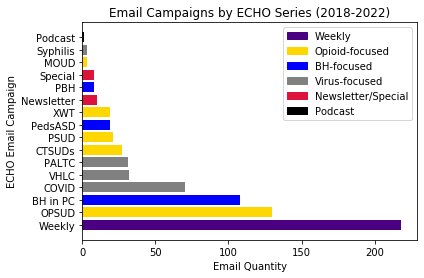

In [15]:
#Visualize Table #2 w/matplotlib for 2018-2022
email_count = series_totals_df['Email Count']
series = list(series_totals_df.index.values)

plt.barh(series, email_count, color=['indigo','gold','blue','grey','grey','grey','gold','gold','blue','gold','crimson','blue','crimson','gold','grey','black'])
plt.title("Email Campaigns by ECHO Series (2018-2022)")
plt.xlabel("Email Quantity")
plt.ylabel("ECHO Email Campaign")

#create a legend
indigo_patch = mpatches.Patch(color='indigo', label='Weekly')
gold_patch = mpatches.Patch(color='gold', label='Opioid-focused')
blue_patch = mpatches.Patch(color='blue', label='BH-focused')
gray_patch = mpatches.Patch(color='gray', label='Virus-focused')
crimson_patch = mpatches.Patch(color='crimson', label='Newsletter/Special')
black_patch = mpatches.Patch(color='black', label='Podcast')
plt.legend(handles=[indigo_patch, gold_patch, blue_patch, gray_patch, crimson_patch, black_patch])

plt.show()

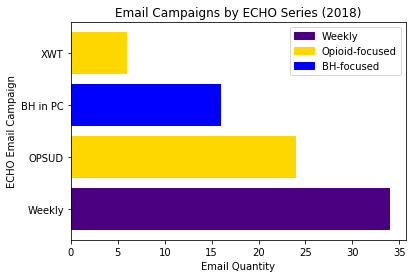

In [16]:
#Visualize Table #2 w/matplotlib for 2018 ONLY
series_totals_2018 = email_data_df.loc[(email_data_df['Date'] < '1/1/2019')].groupby(email_data_df['Series']).sum()

#add an additional column that counts the number of emails for each series
email_count_2018 = email_data_df.loc[(email_data_df['Date'] < '1/1/2019')].groupby(['Series'])['Title'].count()
series_totals_2018.insert(0, 'Email Count', email_count_2018)

#arrange the data in descending order
series_totals_2018 = series_totals_2018.sort_values(by='Email Count', ascending=False)

#visualize the 2018 data
email_count = series_totals_2018['Email Count']
series = list(series_totals_2018.index.values)

plt.barh(series, email_count, color=['indigo','gold','blue','gold'])
plt.title("Email Campaigns by ECHO Series (2018)")
plt.xlabel("Email Quantity")
plt.ylabel("ECHO Email Campaign")

#create a legend
indigo_patch = mpatches.Patch(color='indigo', label='Weekly')
gold_patch = mpatches.Patch(color='gold', label='Opioid-focused')
blue_patch = mpatches.Patch(color='blue', label='BH-focused')
plt.legend(handles=[indigo_patch, gold_patch, blue_patch])

plt.show()

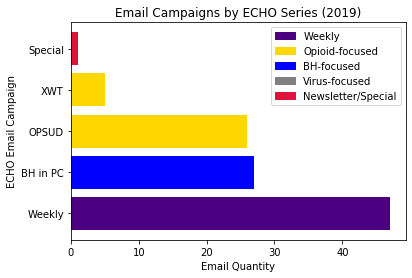

In [17]:
#Visualize Table #2 w/matplotlib for 2019 ONLY
series_totals_2019 = email_data_df.loc[email_data_df['Date'].between('12/31/2018', '1/1/2020')].groupby(email_data_df['Series']).sum()

#add an additional column that counts the number of emails for each series
email_count_2019 = email_data_df.loc[(email_data_df['Date'].between('12/31/2018', '1/1/2020'))].groupby(['Series'])['Title'].count()
series_totals_2019.insert(0, 'Email Count', email_count_2019)

#arrange the data in descending order
series_totals_2019 = series_totals_2019.sort_values(by='Email Count', ascending=False)

#visualize the 2019 data
email_count = series_totals_2019['Email Count']
series = list(series_totals_2019.index.values)

plt.barh(series, email_count, color=['indigo','blue','gold','gold', 'crimson'])
plt.title("Email Campaigns by ECHO Series (2019)")
plt.xlabel("Email Quantity")
plt.ylabel("ECHO Email Campaign")

#create a legend
indigo_patch = mpatches.Patch(color='indigo', label='Weekly')
gold_patch = mpatches.Patch(color='gold', label='Opioid-focused')
blue_patch = mpatches.Patch(color='blue', label='BH-focused')
crimson_patch = mpatches.Patch(color='crimson', label='Newsletter/Special')
plt.legend(handles=[indigo_patch, gold_patch, blue_patch, gray_patch, crimson_patch])

plt.show()

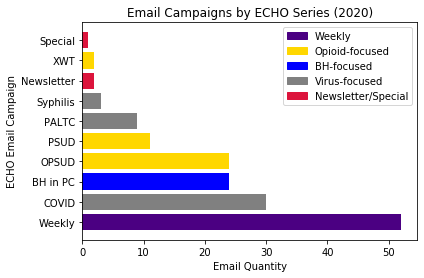

In [18]:
#Visualize Table #2 w/matplotlib for 2020 ONLY
series_totals_2020 = email_data_df.loc[email_data_df['Date'].between('12/31/2019', '1/1/2021')].groupby(email_data_df['Series']).sum()

#add an additional column that counts the number of emails for each series
email_count_2020 = email_data_df.loc[(email_data_df['Date'].between('12/31/2019', '1/1/2021'))].groupby(['Series'])['Title'].count()
series_totals_2020.insert(0, 'Email Count', email_count_2020)

#arrange the data in descending order
series_totals_2020 = series_totals_2020.sort_values(by='Email Count', ascending=False)

#visualize the 2020 data
email_count = series_totals_2020['Email Count']
series = list(series_totals_2020.index.values)

plt.barh(series, email_count, color=['indigo','gray','blue','gold','gold','gray','gray','crimson','gold','crimson'])
plt.title("Email Campaigns by ECHO Series (2020)")
plt.xlabel("Email Quantity")
plt.ylabel("ECHO Email Campaign")

#create a legend
indigo_patch = mpatches.Patch(color='indigo', label='Weekly')
gold_patch = mpatches.Patch(color='gold', label='Opioid-focused')
blue_patch = mpatches.Patch(color='blue', label='BH-focused')
gray_patch = mpatches.Patch(color='gray', label='Virus-focused')
crimson_patch = mpatches.Patch(color='crimson', label='Newsletter/Special')
plt.legend(handles=[indigo_patch, gold_patch, blue_patch, gray_patch, crimson_patch])

plt.show()

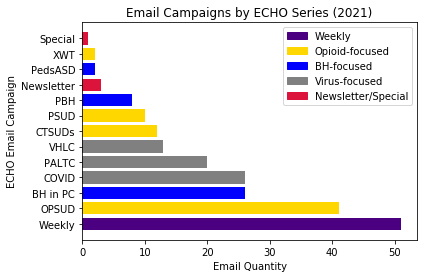

In [19]:
#Visualize Table #2 w/matplotlib for 2021 ONLY
series_totals_2021 = email_data_df.loc[email_data_df['Date'].between('12/31/2020', '1/1/2022')].groupby(email_data_df['Series']).sum()

#add an additional column that counts the number of emails for each series
email_count_2021 = email_data_df.loc[(email_data_df['Date'].between('12/31/2020', '1/1/2022'))].groupby(['Series'])['Title'].count()
series_totals_2021.insert(0, 'Email Count', email_count_2021)

#arrange the data in descending order
series_totals_2021 = series_totals_2021.sort_values(by='Email Count', ascending=False)

#visualize the 2021 data
email_count = series_totals_2021['Email Count']
series = list(series_totals_2021.index.values)

plt.barh(series, email_count, color=['indigo','gold','blue','gray','gray','gray','gold','gold','blue','crimson','blue','gold','crimson'])
plt.title("Email Campaigns by ECHO Series (2021)")
plt.xlabel("Email Quantity")
plt.ylabel("ECHO Email Campaign")

#create a legend
indigo_patch = mpatches.Patch(color='indigo', label='Weekly')
gold_patch = mpatches.Patch(color='gold', label='Opioid-focused')
blue_patch = mpatches.Patch(color='blue', label='BH-focused')
gray_patch = mpatches.Patch(color='gray', label='Virus-focused')
crimson_patch = mpatches.Patch(color='crimson', label='Newsletter/Special')
plt.legend(handles=[indigo_patch, gold_patch, blue_patch, gray_patch, crimson_patch])

plt.show()

In [20]:
#TABLE 3: A table of the total types of emails sent
#create a new dataframe that uses the email type as the index
type_totals_df = email_data_df.groupby(email_data_df['Type']).sum()

# add an additional column that counts the number of emails for each email type
type_count = email_data_df.groupby(['Type'])['Title'].count()
type_totals_df.insert(0, 'Email Count', type_count)

# # arrange the data in descending order
type_totals_df = type_totals_df.sort_values(by='Email Count', ascending=False)

# # show the table
type_totals_df

,Email Count,Total Recipients,Successful Deliveries,Total Bounces,Times Forwarded,Forwarded Opens,Unique Opens,Open Rate,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,FB Likes,Visits,New Visits,Pages/Visit,Bounce Rate
Type,,,,,,,,,,,,,,,,,,
Daily,427,274679,273703,678.0,78.0,63.0,84242,145.64,188821,17901,42.70,52891,165,0.0,3249.0,1366.0,298.500422,81.82
Weekly,218,314856,313681,727.0,66.0,91.0,89927,69.35,192407,9966,11.18,29107,267,0.0,1960.0,663.0,207.592715,51.89
XWT Promo,14,11132,11026,67.0,3.0,4.0,2908,5.33,13460,228,0.85,837,17,0.0,309.0,155.0,17.126475,5.98
Special - General,13,7829,7786,23.0,0.0,0.0,2428,5.35,11489,368,1.20,1564,9,0.0,394.0,225.0,14.476329,4.79
Newsletter,10,17258,17205,19.0,0.0,0.0,4094,2.33,7758,543,0.32,1798,11,0.0,90.0,44.0,3.222222,0.60
Special - Series Launch/Re-Launch,10,16263,16154,27.0,0.0,0.0,4583,3.20,10649,447,0.57,1716,13,0.0,0.0,0.0,0.000000,0.00
Special - Series Finale/Follow-up,7,1729,1724,0.0,0.0,0.0,561,2.79,1053,48,0.73,194,2,0.0,0.0,0.0,0.000000,0.00
Special - Redaction,5,4262,4252,0.0,0.0,0.0,1270,1.77,2611,95,0.22,314,0,0.0,0.0,0.0,0.000000,0.00
Special - Guest Presenter,2,4234,4212,22.0,6.0,2.0,1046,0.51,2590,176,0.09,586,1,0.0,0.0,0.0,0.000000,0.00


In [21]:
#TABLE 4: Newsletter Data
#create a table showing the relevant newsletter data
Newsletter_df = email_data_df.loc[(email_data_df['Type'] == 'Newsletter')]
Newsletter_df = Newsletter_df.drop(['Type','Title'], axis=1)
Newsletter_df = Newsletter_df.sort_values(by="Date")
Newsletter_df = Newsletter_df.drop(242)
Newsletter_df

,Date,Weekday,Time,Series,Subject,Total Recipients,Successful Deliveries,Total Bounces,Times Forwarded,Forwarded Opens,...,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,FB Likes,Visits,New Visits,Pages/Visit,Bounce Rate
233,2020-08-11,Tuesday,9:00:00,Newsletter,August 2020ECHO Idaho Newsletter,1238,1236,2.0,0.0,0.0,...,932,23,0.02,156,0,0.0,90.0,44.0,3.222222,0.6
234,2020-11-19,Thursday,6:00:00,Newsletter,November 2020 ECHO Idaho Newsletter,1357,1355,2.0,0.0,0.0,...,679,34,0.03,232,0,0.0,0.0,0.0,0.000000,0.0
235,2021-02-10,Wednesday,6:00:00,Newsletter,February 2021 ECHO Idaho Newsletter,1464,1459,5.0,0.0,0.0,...,799,49,0.03,102,2,0.0,0.0,0.0,0.000000,0.0
236,2021-05-11,Tuesday,7:00:00,Newsletter,May 2021 ECHO Idaho Newsletter,1546,1540,6.0,0.0,0.0,...,507,43,0.03,103,0,0.0,0.0,0.0,0.000000,0.0
237,2021-11-10,Wednesday,7:00:00,Newsletter,November 2021 ECHO Idaho Newsletter,1729,1726,0.0,0.0,0.0,...,524,58,0.03,153,0,0.0,0.0,0.0,0.000000,0.0
238,2022-01-20,Thursday,4:00:00,Newsletter,January 2022 ECHO Idaho Newsletter,1980,1974,0.0,0.0,0.0,...,1024,78,0.04,496,3,0.0,0.0,0.0,0.000000,0.0
239,2022-03-10,Thursday,5:30:00,Newsletter,March 2022 ECHO Idaho Newsletter,2045,2042,0.0,0.0,0.0,...,806,116,0.06,177,0,0.0,0.0,0.0,0.000000,0.0
240,2022-05-11,Wednesday,6:00:00,Newsletter,May 2022 ECHO Idaho Newsletter,2106,2091,0.0,0.0,0.0,...,868,57,0.03,179,2,0.0,0.0,0.0,0.000000,0.0
241,2022-07-13,Wednesday,7:00:00,Newsletter,July 2022 ECHO Idaho Newsletter,2207,2200,0.0,0.0,0.0,...,1134,43,0.02,106,1,0.0,0.0,0.0,0.000000,0.0


C:\Users\ssteffen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ssteffen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ssteffen\Anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas w

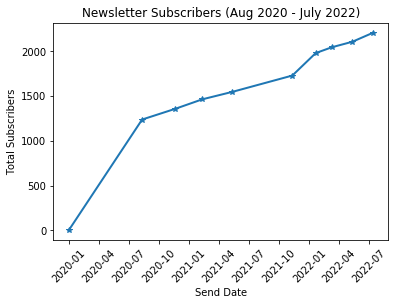

In [22]:
#Plot Newsletter date and recipients subscribed recipients by date (2018-2022)

#create a new df of the data to be plotted
Newsletter_recips = Newsletter_df[['Date', 'Total Recipients']]

#add a zero date and term to the data to be plotted
Newsletter_recips.loc[len(Newsletter_recips.index)] = ['2020-1-1', 0] 

#change the datatype to a dt
Newsletter_recips['Date'] = pd.to_datetime(Newsletter_recips['Date'], format='%Y/%m/%d')

#sort the df by date
Newsletter_recips_sorted = Newsletter_recips.sort_values(by='Date')

# set the x and y axis to data variables
x_axis = Newsletter_recips_sorted['Date']
y_axis = Newsletter_recips_sorted['Total Recipients']

plt.plot(x_axis,y_axis, linewidth=2, marker='*')
plt.title('Newsletter Subscribers (Aug 2020 - July 2022)')
plt.xlabel('Send Date')
plt.ylabel('Total Subscribers')
plt.xticks(rotation = 45)
plt.show()

In [23]:
# TABLE 5: A table illustrating the TOD as bins and open/click data for each series
#create a new row in the email_data_df called "Times" that converts the "Time" column to a datetime data type
email_data_df['Times'] = pd.to_datetime(email_data_df['Time'], format='%H:%M:%S').dt.time
email_data_df['Times'].describe()

#make time bins!!!
# bins = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

count          708
unique         114
top       06:00:00
freq           411
Name: Times, dtype: object

# iECHO (Attendance) Data

In [24]:
#name the filepath to the data
# former_file_path = "C:\\Users\\ssteffen\\Desktop\\Sam\\Email_data\\email_data.csv"
#to get the current file path, enter 'pwd' in GitBash terminal:
# /c/Users/ssteffen/University of Idaho/Storage-Boise - ECHO/Staff/Sam/Data
root_file_path = 'C:\\Users\\ssteffen\\University of Idaho\\Storage-Boise - ECHO\\Staff\\Sam\\Data\\Spreadsheets\\iECHO data\\' 
data_path_2018 = f'{root_file_path}2018_iECHO_data.csv' 
data_path_2019 = f'{root_file_path}2019_iECHO_data.csv' 
data_path_2020 = f'{root_file_path}2020_iECHO_data.csv' 
data_path_2021 = f'{root_file_path}2021_iECHO_data.csv' 
data_path_cumulative = f'{root_file_path}2018-2021_iECHO_attendance_data.csv'

# read the 2018-2021 data into separate dataframes
iecho_data_2018 = pd.read_csv(data_path_2018)
iecho_data_2019 = pd.read_csv(data_path_2019)
iecho_data_2020 = pd.read_csv(data_path_2020)
iecho_data_2021 = pd.read_csv(data_path_2021)
iecho_data_cumulative = pd.read_csv(data_path_cumulative)

# 2018 Attendance Data

In [25]:
#clean 2018 data in preparation for merging all the dfs into one

#list 2018 data column headers
print(iecho_data_2018.columns)

Index(['Date', 'Clinic Name', 'Session Topic', 'Full Name', 'First Name',
       'Last Name', 'Date.1', 'Attendee Type', 'Job Title', 'Credentials',
       'Specialty', 'Attendee Street Address', 'Attendee City',
       'Attendee State', 'Attendee Zip Code', 'Attendee County',
       'Attendee Email 1', 'Attendee Email 2', 'Health Center Name',
       'Health Center Street Address', 'Health Center City',
       'Health Center State', 'Health Center Zip Code', 'Health Center County',
       'Unnamed: 24', 'Unnamed: 25', 'Unique Series (3)', '# of Sessions',
       'Unique Attendance by Series',
       '# of People who attended 2+ sessions in same series',
       'of 29 people who attended +1 ECHO series', 'Unique Part by County',
       '2018 total', 'Unnamed: 33', '232 Unique Participants', 'COUNTY',
       'Unnamed: 36', 'Sessions Attended', 'OPSUD', 'BHPC', 'XWAIV'],
      dtype='object')


In [26]:
#eliminate unnecessary columns
iecho_data_2018 = iecho_data_2018.drop(['Date.1',
                                        'First Name',
                                        'Last Name',
                                        'Unnamed: 24',
                                        'Unnamed: 25',
                                        'Unique Series (3)',
                                        '# of Sessions',
                                        'Unique Attendance by Series',
                                        '# of People who attended 2+ sessions in same series',
                                        'of 29 people who attended +1 ECHO series',
                                        'Unique Part by County',
                                        '2018 total',
                                        'Unnamed: 33',
                                        '232 Unique Participants',
                                        'COUNTY',
                                        'Unnamed: 36',
                                        'Sessions Attended',
                                        'OPSUD',
                                        'BHPC',
                                        'XWAIV'
                                       ], axis=1)

iecho_data_2018.head()

,Date,Clinic Name,Session Topic,Full Name,Attendee Type,Job Title,Credentials,Specialty,Attendee Street Address,Attendee City,...,Attendee Zip Code,Attendee County,Attendee Email 1,Attendee Email 2,Health Center Name,Health Center Street Address,Health Center City,Health Center State,Health Center Zip Code,Health Center County
0,3/15/2018,"Opioids, Pain, and Substance Use Disorders",ECHO for Addressing Opioid Addiction and Treat...,Amy Hirtle,Attendee,Public Health Professional,CHW,NaN,8500 N Atlas Rd,Hayden,...,83835,Kootenai / 1,ahirtle@phd1.idaho.gov,NaN,Idaho Public Health District 1 (Panhandle),8500 N Atlas Rd,Hayden,ID,83835,Kootenai / 1
1,3/15/2018,"Opioids, Pain, and Substance Use Disorders",ECHO for Addressing Opioid Addiction and Treat...,Ann Watkins,Attendee,Public Health Professional,NaN,NaN,"450 W State St, PO Box 83720",Boise,...,83720-0036,Ada / 4,ann.watkins@dhw.idaho.gov,watkinsa@dhw.idaho.gov,Idaho Department of Health and Welfare - Main,"450 W State St, PO Box 83720",Boise,ID,83720-0036,Ada / 4
2,3/15/2018,"Opioids, Pain, and Substance Use Disorders",ECHO for Addressing Opioid Addiction and Treat...,Brittany Pope,Attendee,Healthcare Administrator,BS,NaN,215 10 St,Lewiston,...,83501,Nez Perce / 2,bpope@phd2.idaho.gov,NaN,Idaho Public Health District 2 (North Central),215 10 St,Lewiston,ID,83501,Nez Perce / 2
3,3/15/2018,"Opioids, Pain, and Substance Use Disorders",ECHO for Addressing Opioid Addiction and Treat...,Doris Ziegeldorf,Attendee,Nurse Practitioner,FNP-BC,"Hormone therapy, weight, fibromyalgia, women’s...",1522 17 St,Lewiston,...,83501,Nez Perce / 2,ladynp1995@hotmail.com,dziegeldorf@tsmh.org,Clearwater Medical Clinic,1522 17 St,Lewiston,ID,83501,Nez Perce / 2
4,3/15/2018,"Opioids, Pain, and Substance Use Disorders",ECHO for Addressing Opioid Addiction and Treat...,Doug Whatmore,Attendee,Physician,MD,"Internal Medicine, Cardiology, Critical Care M...",165 E Harvest Run Cir,Idaho Falls,...,83404,Bonneville / 7,Doug.whatmore@hcahealthcare.com,docwot@cableone.net,Eastern Idaho Regional Medical Center,165 E Harvest Run Cir,Idaho Falls,ID,83404,Bonneville / 7


In [27]:
# view the data
iecho_data_2018.describe()

,Date,Clinic Name,Session Topic,Full Name,Attendee Type,Job Title,Credentials,Specialty,Attendee Street Address,Attendee City,...,Attendee Zip Code,Attendee County,Attendee Email 1,Attendee Email 2,Health Center Name,Health Center Street Address,Health Center City,Health Center State,Health Center Zip Code,Health Center County
count,771,771,771,771,771,771,676,188,771,771,...,771,771,731,151,771,766,771,771,771,771
unique,27,3,27,232,2,17,69,55,125,51,...,71,39,209,31,101,98,47,11,63,38
top,12/10/2018,"Opioids, Pain, and Substance Use Disorders",MAT Waiver Training,Lachelle Smith,Attendee,Other - Not Pt. Care,MD,"Primary care integration, depression, anxiety,...",322 E Front St,Boise,...,83501,Ada / 4,lachellesmith@uidaho.edu,kirsten.rosin@phd3.idaho.gov,University of Idaho - Boise,322 E Front St,Boise,ID,83702,Ada / 4
freq,69,415,69,26,657,169,104,17,95,271,...,92,331,26,17,118,121,257,749,145,315


### Fill in Empty Values with NaNs

In [28]:
#print the column titles as a list
# print(iecho_data_2018.columns)

#add the list to the .apply method to fill in missing data with NaNs
iecho_data_2018 = iecho_data_2018[['Date', 'Clinic Name', 'Session Topic', 'Full Name', 'Attendee Type',
       'Job Title', 'Credentials', 'Specialty', 'Attendee Street Address',
       'Attendee City', 'Attendee State', 'Attendee Zip Code',
       'Attendee County', 'Attendee Email 1', 'Attendee Email 2',
       'Health Center Name', 'Health Center Street Address',
       'Health Center City', 'Health Center State', 'Health Center Zip Code',
       'Health Center County']].apply(lambda x: x.str.strip()).replace('', np.nan)

iecho_data_2018['Clinic Name'].value_counts()

Opioids, Pain, and Substance Use Disorders    415
Behavioral Health in Primary Care             287
X-Waiver Training                              69
Name: Clinic Name, dtype: int64

### Change the Series Names

In [29]:
#change the series data to match the terms of email_data in preparation for a merge
# iecho_data_2018['Clinic Name'].value_counts()

#change 'Opioids, Pain, and Substance Use Disorders' to 'OPSUD'
iecho_data_2018['Clinic Name'] = iecho_data_2018['Clinic Name'].apply(lambda x: x.strip()).replace('Opioids, Pain, and Substance Use Disorders', 'OPSUD')

#change 'Behavioral Health in Primary Care' to 'BH in PC'
iecho_data_2018['Clinic Name'] = iecho_data_2018['Clinic Name'].apply(lambda x: x.strip()).replace('Behavioral Health in Primary Care', 'BH in PC')

#change 'X-Waiver Training' to 'XWT'
iecho_data_2018['Clinic Name'] = iecho_data_2018['Clinic Name'].apply(lambda x: x.strip()).replace('X-Waiver Training', 'XWT')

iecho_data_2018['Clinic Name'].value_counts()

#create a df that will show the attendance count by session


OPSUD       415
BH in PC    287
XWT          69
Name: Clinic Name, dtype: int64

### Create a Session Attendance Dataframe

In [30]:
#create a new df that shows each session topic by series, date, and attendance per session
session_topics_2018 = iecho_data_2018[['Clinic Name', 'Session Topic', 'Full Name','Date']]
session_attendance_raw = session_topics_2018.groupby(['Clinic Name', 'Session Topic', 'Date'])['Full Name'].count()
session_attendance_2018_df = pd.DataFrame(session_attendance_raw)
#change the name of the 'Full Name' count to 'Attendance'
session_attendance_2018_df.rename(columns = {'Full Name':'Attendance'}, inplace=True)

#reset the index
session_attendance_2018_df.reset_index(inplace=True)

session_attendance_2018_df

,Clinic Name,Session Topic,Date,Attendance
0,BH in PC,"Boundaries, Therapeutic Modalities, and Therap...",11/14/2018,30
1,BH in PC,Co-Occurring Disorders,10/17/2018,37
2,BH in PC,Common Interactions and Dosage Considerations ...,11/28/2018,30
3,BH in PC,Gender Dysphoria,10/3/2018,45
4,BH in PC,Geriatric Psychiatry and Considerations in the...,10/31/2018,30
5,BH in PC,Mood Disorders,9/19/2018,40
6,BH in PC,Perinatal Mood Disorders,12/12/2018,26
7,BH in PC,Somatic Symptom and Related Disorders,9/5/2018,49
8,OPSUD,Acupuncture,11/8/2018,16
9,OPSUD,Addiction Treatment Overview,6/7/2018,21


### Convert the Datatypes

In [31]:
#change the data types of inappropriate datatypes, if necessary
# session_attendance_2018_df.dtypes
session_attendance_2018_df['Date'] = pd.to_datetime(session_attendance_2018_df['Date'], format='%m/%d/%Y')
# session_attendance_2018_df.dtypes

#reorder the df
session_attendance_2018_df = session_attendance_2018_df.sort_values(by='Date')

### Plot the 2018 Attendance Totals

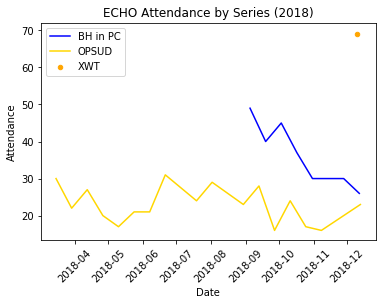

In [32]:
#plot the 2018 session attendance data using a multi-line graph

#slice the 2018 df by series
BH_PC_attendance_2018 = session_attendance_2018_df.loc[(session_attendance_2018_df['Clinic Name'] == 'BH in PC')]
bhpc_date_2018 = BH_PC_attendance_2018['Date'].to_list()
bhpc_attendance_2018 = BH_PC_attendance_2018['Attendance'].to_list()

OPSUD_attendance_2018 = session_attendance_2018_df.loc[(session_attendance_2018_df['Clinic Name'] == 'OPSUD')]
OPSUD_date_2018 = OPSUD_attendance_2018['Date'].to_list()
OPSUD_attendance_2018 = OPSUD_attendance_2018['Attendance'].to_list()

XWT_attendance_2018 = session_attendance_2018_df.loc[(session_attendance_2018_df['Clinic Name'] == 'XWT')]
XWT_date_2018 = XWT_attendance_2018['Date'].to_list()
XWT_attendance_2018 = XWT_attendance_2018['Attendance'].to_list()
  
# plot lines
plt.plot(bhpc_date_2018, bhpc_attendance_2018, label = "BH in PC", color='blue')
plt.plot(OPSUD_date_2018, OPSUD_attendance_2018, label = "OPSUD", color='gold')
plt.scatter(XWT_date_2018, XWT_attendance_2018, label = "XWT", s=20, color='orange')
plt.title("ECHO Attendance by Series (2018)")
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

# 2019 Attendance Totals

In [33]:
#clean 2019 data in preparation for merging all the dfs into one

#list 2018 data column headers
print(iecho_data_2019.columns)

Index(['Date', 'Clinic Name', 'Session Topic', 'Full Name', 'First Name',
       'Last Name', 'Date.1', 'Attendee Type', 'Job Title', 'Credentials',
       'Specialty', 'Attendee Street Address', 'Attendee City',
       'Attendee State', 'Attendee Zip Code', 'Attendee County',
       'Attendee Email 1', 'Attendee Email 2', 'Health Center Name',
       'Health Center Street Address', 'Health Center City',
       'Health Center State', 'Health Center Zip Code',
       'Health Center County'],
      dtype='object')


In [34]:
#eliminate unnecessary columns
iecho_data_2019 = iecho_data_2019.drop(['Date.1',
                                        'First Name',
                                        'Last Name',
                                       ], axis=1)

iecho_data_2019.head()

,Date,Clinic Name,Session Topic,Full Name,Attendee Type,Job Title,Credentials,Specialty,Attendee Street Address,Attendee City,...,Attendee Zip Code,Attendee County,Attendee Email 1,Attendee Email 2,Health Center Name,Health Center Street Address,Health Center City,Health Center State,Health Center Zip Code,Health Center County
0,1/10/2019,"Opioids, Pain, and Substance Use Disorders",Diversion,Alexis Shanahan,Attendee,Physician,MD,Internal medicine,1941 N Montclair Dr,Boise,...,83702,Ada / 4,shanaha@slhs.org,eras1314@gmail.com,St. Lukeand#039;s Health System - Boise Medica...,190 E Bannock St,Boise,ID,83702,Ada / 4
1,1/10/2019,"Opioids, Pain, and Substance Use Disorders",Diversion,Ann Lima,Attendee,Physician,"MD, MPH",NaN,301 Cedar St,Orofino,...,83544,Clearwater / 2,ann.lima@smh-cvhc.org,NaN,Clearwater Valley Hospital and Clinics,301 Cedar St,Orofino,ID,83544,Clearwater / 2
2,1/10/2019,"Opioids, Pain, and Substance Use Disorders",Diversion,Cheryl Loetscher,Attendee,Nurse Practitioner,APRN,NP,1522 17 St,Lewiston,...,83501,Nez Perce / 2,cherylloetscher@cableone.net,cloetscher@tsmh.org,Clearwater Medical Clinic,1522 17 St,Lewiston,ID,83501,Nez Perce / 2
3,1/10/2019,"Opioids, Pain, and Substance Use Disorders",Diversion,Chuck Wahl,Attendee,Other - Not Pt. Care,NaN,NaN,"3003 W Main St, Ste 200",Boise,...,83702,Ada / 4,Chuck Wahl,NaN,DEA,"3003 W Main St, Ste 200",Boise,ID,83702,Ada / 4
4,1/10/2019,"Opioids, Pain, and Substance Use Disorders",Diversion,Doris Ziegeldorf,Attendee,Nurse Practitioner,FNP-BC,"Hormone therapy, weight, fibromyalgia, women’s...",1522 17 St,Lewiston,...,83501,Nez Perce / 2,ladynp1995@hotmail.com,dziegeldorf@tsmh.org,Clearwater Medical Clinic,1522 17 St,Lewiston,ID,83501,Nez Perce / 2


In [35]:
# view the data
iecho_data_2019.describe()

,Date,Clinic Name,Session Topic,Full Name,Attendee Type,Job Title,Credentials,Specialty,Attendee Street Address,Attendee City,...,Attendee Zip Code,Attendee County,Attendee Email 1,Attendee Email 2,Health Center Name,Health Center Street Address,Health Center City,Health Center State,Health Center Zip Code,Health Center County
count,1421,1421,1421,1420,1420,1420,1341,481,1416,1420,...,1420,1420,1421,214,1420,1389,1420,1420,1420,1420
unique,47,3,47,460,2,18,119,120,248,70,...,108,51,463,43,199,188,64,10,95,48
top,2/28/2019,"Opioids, Pain, and Substance Use Disorders",MAT Waiver Training,Lachelle Smith,Attendee,Other - Not Pt. Care,MD,"Primary care integration, depression, anxiety,...",1522 17 St,Boise,...,83702,Ada / 4,lachellesmith@uidaho.edu,dziegeldorf@tsmh.org,University of Idaho - Boise,322 E Front St,Boise,ID,83702,Ada / 4
freq,49,726,66,43,1242,311,172,31,103,473,...,176,570,43,24,154,154,470,1361,274,561


### Fill in Empty Values with NaNs

In [36]:
#print the column titles as a list
# print(iecho_data_2019.columns)

#add the list to the .apply method to fill in missing data with NaNs
iecho_data_2019 = iecho_data_2019[['Date', 'Clinic Name', 'Session Topic', 'Full Name',
       'Attendee Type', 'Job Title', 'Credentials',
       'Specialty', 'Attendee Street Address', 'Attendee City',
       'Attendee State', 'Attendee Zip Code', 'Attendee County',
       'Attendee Email 1', 'Attendee Email 2', 'Health Center Name',
       'Health Center Street Address', 'Health Center City',
       'Health Center State', 'Health Center Zip Code',
       'Health Center County']].apply(lambda x: x.str.strip()).replace('', np.nan)

iecho_data_2019['Clinic Name'].value_counts()

Opioids, Pain, and Substance Use Disorders    726
Behavioral Health in Primary Care             629
X-Waiver Training                              66
Name: Clinic Name, dtype: int64

### Change the Series Names

In [37]:
#change the series data to match the terms of email_data in preparation for a merge
# iecho_data_2019['Clinic Name'].value_counts()

#change 'Opioids, Pain, and Substance Use Disorders' to 'OPSUD'
iecho_data_2019['Clinic Name'] = iecho_data_2019['Clinic Name'].apply(lambda x: x.strip()).replace('Opioids, Pain, and Substance Use Disorders', 'OPSUD')

#change 'Behavioral Health in Primary Care' to 'BH in PC'
iecho_data_2019['Clinic Name'] = iecho_data_2019['Clinic Name'].apply(lambda x: x.strip()).replace('Behavioral Health in Primary Care', 'BH in PC')

#change 'X-Waiver Training' to 'XWT'
iecho_data_2019['Clinic Name'] = iecho_data_2019['Clinic Name'].apply(lambda x: x.strip()).replace('X-Waiver Training', 'XWT')

iecho_data_2019['Clinic Name'].value_counts()

# create a df that will show the attendance count by session

OPSUD       726
BH in PC    629
XWT          66
Name: Clinic Name, dtype: int64

### Create a Session Attendance DataFrame

In [38]:
#create a new df that shows each session topic by series, date, and attendance per session
session_topics_2019 = iecho_data_2019[['Clinic Name', 'Session Topic', 'Full Name','Date']]
session_attendance_raw = session_topics_2019.groupby(['Clinic Name', 'Session Topic', 'Date'])['Full Name'].count()
session_attendance_2019_df = pd.DataFrame(session_attendance_raw)
#change the name of the 'Full Name' count to 'Attendance'
session_attendance_2019_df.rename(columns = {'Full Name':'Attendance'}, inplace=True)

#reset the index
session_attendance_2019_df.reset_index(inplace=True)

session_attendance_2019_df

,Clinic Name,Session Topic,Date,Attendance
0,BH in PC,Adolescents and ADHD,2/6/2019,23
1,BH in PC,Adolescents and Suicide,7/17/2019,32
2,BH in PC,Anxiety,11/20/2019,42
3,BH in PC,Application of Principles of CBT-I for Managem...,6/5/2019,30
4,BH in PC,Autism Spectrum Disorders Pt I,4/3/2019,28
5,BH in PC,Autism Spectrum Disorders Pt II,4/17/2019,29
6,BH in PC,CBT for Anger Management,10/2/2019,28
7,BH in PC,Chronic Medical Conditions in Mental Illness,11/6/2019,31
8,BH in PC,Co-Occurring Disorders,5/1/2019,31
9,BH in PC,Co-Occurring Disorders (Grand Rounds at St. Lu...,1/23/2019,8


### Convert the Datatypes

In [39]:
#change the data types of inappropriate datatypes, if necessary
# session_attendance_2019_df.dtypes
session_attendance_2019_df['Date'] = pd.to_datetime(session_attendance_2019_df['Date'], format='%m/%d/%Y')
# session_attendance_2018_df.dtypes

#reorder the df
session_attendance_2019_df = session_attendance_2019_df.sort_values(by='Date')

### Plot the 2019 Attendance Totals

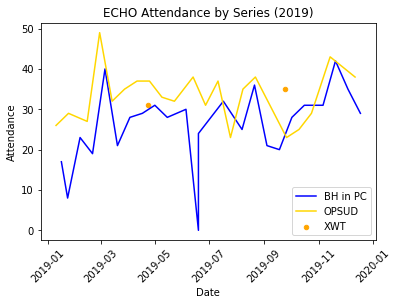

In [40]:
#plot the 2019 session attendance data using a multi-line graph

#slice the 2019 df by series
BH_PC_attendance_2019 = session_attendance_2019_df.loc[(session_attendance_2019_df['Clinic Name'] == 'BH in PC')]
bhpc_date_2019 = BH_PC_attendance_2019['Date'].to_list()
bhpc_attendance_2019 = BH_PC_attendance_2019['Attendance'].to_list()

OPSUD_attendance_2019 = session_attendance_2019_df.loc[(session_attendance_2019_df['Clinic Name'] == 'OPSUD')]
OPSUD_date_2019 = OPSUD_attendance_2019['Date'].to_list()
OPSUD_attendance_2019 = OPSUD_attendance_2019['Attendance'].to_list()

XWT_attendance_2019 = session_attendance_2019_df.loc[(session_attendance_2019_df['Clinic Name'] == 'XWT')]
XWT_date_2019 = XWT_attendance_2019['Date'].to_list()
XWT_attendance_2019 = XWT_attendance_2019['Attendance'].to_list()
  
# plot lines
plt.plot(bhpc_date_2019, bhpc_attendance_2019, label = "BH in PC", color='blue')
plt.plot(OPSUD_date_2019, OPSUD_attendance_2019, label = "OPSUD", color='gold')
plt.scatter(XWT_date_2019, XWT_attendance_2019, label = "XWT", s=20, color='orange')
plt.title("ECHO Attendance by Series (2019)")
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

# 2020 Attendance Totals

In [41]:
#clean 2020 data in preparation for merging all the dfs into one

#list 2020 data column headers
print(iecho_data_2020.columns)

Index(['Date', 'Clinic Name', 'Session Topic', 'Full Name', 'First Name',
       'Last Name', 'Date.1', 'Attendee Type', 'Job Title', 'Credentials',
       'Specialty', 'Attendee Street Address', 'Attendee City',
       'Attendee State', 'Attendee Zip Code', 'COPY', 'COPY.1',
       'Attendee County', 'Attendee Email 1', 'Attendee Email 2',
       'Health Center Name', 'Health Center Street Address',
       'Health Center City', 'Health Center State', 'Health Center Zip Code',
       'Health Center County'],
      dtype='object')


In [42]:
#eliminate unnecessary columns
iecho_data_2020 = iecho_data_2020.drop(['Date.1',
                                        'First Name',
                                        'Last Name',
                                        'COPY',
                                        'COPY.1',
                                        'Health Center County',
                                       ], axis=1)

iecho_data_2020.head()

,Date,Clinic Name,Session Topic,Full Name,Attendee Type,Job Title,Credentials,Specialty,Attendee Street Address,Attendee City,Attendee State,Attendee Zip Code,Attendee County,Attendee Email 1,Attendee Email 2,Health Center Name,Health Center Street Address,Health Center City,Health Center State,Health Center Zip Code
0,1/9/2020,"Opioids, Pain, and Substance Use Disorders",Exercise and Chronic Pain- Block 1,Alison Salyer,Attendee,Health Profession Student,MSW Intern,NaN,"301 N Mission St, PO Box 4403",Cascade,ID,83611,Valley / 4,ras18eg@my.fsu.edu,asalyer@cmchd.org,Cascade Medical Center,"402 Lake Cascade Pkwy, PO Box 1330",Cascade,ID,83611
1,1/9/2020,"Opioids, Pain, and Substance Use Disorders",Exercise and Chronic Pain- Block 1,Amanda Wray,Attendee,Pharmacist,PharmD,Pain Management,98 Poplar St,Blackfoot,ID,83221,Bingham / 6,amwray@binghammemorial.org,NaN,Bingham Memorial Hospital,98 Poplar St,Blackfoot,ID,83221
2,1/9/2020,"Opioids, Pain, and Substance Use Disorders",Exercise and Chronic Pain- Block 1,Andy Bradbury,Attendee,Physician,MD,Emergency Medicine,"525 S Center St, MS 3615",Rexburg,ID,83460-3615,Madison / 7,bradburya@byui.edu,NaN,BYU - Idaho,525 S Center St,Rexburg,ID,83460
3,1/9/2020,"Opioids, Pain, and Substance Use Disorders",Exercise and Chronic Pain- Block 1,Annie Hawkins,Attendee,Nurse Practitioner,APRN,NaN,765 Osprey Cir,Hope,ID,83836,Bonner / 1,ahawkinsaprn@gmail.com,NaN,Guest - Hope,NaN,Hope,ID,83836
4,1/9/2020,"Opioids, Pain, and Substance Use Disorders",Exercise and Chronic Pain- Block 1,Barbara Norton,Attendee,Social Worker,LMSW,NaN,PO Box 172,Donnelly,ID,83615-0172,Valley / 4,barbaragnorton@yahoo.com,bnorton_tcc@yahoo.com,The Change Clinic,"454 W Roseberry Rd, Ste 104",Donnelly,ID,83615


In [43]:
# view the data
iecho_data_2020.describe()

,Date,Clinic Name,Session Topic,Full Name,Attendee Type,Job Title,Credentials,Specialty,Attendee Street Address,Attendee City,Attendee State,Attendee Zip Code,Attendee County,Attendee Email 1,Attendee Email 2,Health Center Name,Health Center Street Address,Health Center City,Health Center State,Health Center Zip Code
count,7363,7363,7363,7363,7360,7360,6280,3021,6479,6510,6510,6510,7363,7363,546,7360,6153,7360,7360,7359
unique,101,9,97,1638,3,28,290,396,760,143,22,211,93,1644,63,655,533,179,30,189
top,3/24/2020,COVID-19,Patient Treatment Q & A,Lachelle Smith,Attendee,Physician,MD,Pharmacy,"450 W State St, PO Box 83720",Boise,ID,83702,Ada / 4,lachellesmith@uidaho.edu,echoidaho@uidaho.edu,University of Idaho - Boise,322 E Front St,Boise,ID,83702
freq,601,3046,600,104,6821,1375,1133,96,252,2277,6038,967,2938,104,77,422,428,2269,6044,1291


### Fill in Empty Values with NaNs

In [44]:
#print the column titles as a list
# print(iecho_data_2020.columns)

#add the list to the .apply method to fill in missing data with NaNs
iecho_data_2020 = iecho_data_2020[['Date', 'Clinic Name', 'Session Topic', 'Full Name', 'Attendee Type',
       'Job Title', 'Credentials', 'Specialty', 'Attendee Street Address',
       'Attendee City', 'Attendee State', 'Attendee Zip Code',
       'Attendee County', 'Attendee Email 1', 'Attendee Email 2',
       'Health Center Name', 'Health Center Street Address',
       'Health Center City', 'Health Center State', 'Health Center Zip Code']].apply(lambda x: x.str.strip()).replace('', np.nan)

iecho_data_2020['Clinic Name'].value_counts()

COVID-19                                        3046
Opioids, Pain, and Substance Use Disorders      1179
Behavioral Health in Primary Care               1153
COVID-19 Nursing Home Safety- Tuesday Cohort     654
Perinatal SUD                                    484
COVID-19 Ambulatory / Acute Care                 429
COVID-19 Nursing Home Safety- Friday Cohort      196
X-Waiver Training                                148
Syphilis in Pregnancy                             74
Name: Clinic Name, dtype: int64

### Change the Series Names

In [45]:
#change the series data to match the terms of email_data in preparation for a merge
# iecho_data_2020['Clinic Name'].value_counts()

#convert 'Clinic Name' column to a string
# iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(str)

#change 'COVID-19' to 'COVID'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('COVID-19', 'COVID')

#change 'Opioids, Pain, and Substance Use Disorders' to 'OPSUD'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('Opioids, Pain, and Substance Use Disorders', 'OPSUD')

#change 'Behavioral Health in Primary Care' to 'BH in PC'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('Behavioral Health in Primary Care', 'BH in PC')

#change 'COVID-19 Nursing Home Safety - Tuesday Cohort' to 'PALTC'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('COVID-19 Nursing Home Safety- Tuesday Cohort', 'PALTC')

#change 'Perinatal SUD' to 'PSUD'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('Perinatal SUD', 'PSUD')

#change 'COVID-19 Ambulatory / Acute Care' to 'COVID'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('COVID-19 Ambulatory / Acute Care', 'COVID')

#change 'COVID-19 Nursing Home Safety - Friday Cohort' to 'PALTC'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('COVID-19 Nursing Home Safety- Friday Cohort', 'PALTC')

#change 'X-Waiver Training' to 'XWT'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('X-Waiver Training', 'XWT')

#change 'Syphilis in Pregnancy' to 'Syphilis'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('Syphilis in Pregnancy', 'Syphilis')

iecho_data_2020['Clinic Name'].value_counts()

# create a df that will show the attendance count by session

COVID       3475
OPSUD       1179
BH in PC    1153
PALTC        850
PSUD         484
XWT          148
Syphilis      74
Name: Clinic Name, dtype: int64

### Create a Session Attendance Dataframe

In [46]:
#create a new df that shows each session topic by series, date, and attendance per session
session_topics_2020 = iecho_data_2020[['Clinic Name', 'Session Topic', 'Full Name','Date']]
session_attendance_raw = session_topics_2020.groupby(['Clinic Name', 'Session Topic', 'Date'])['Full Name'].count()
session_attendance_2020_df = pd.DataFrame(session_attendance_raw)
#change the name of the 'Full Name' count to 'Attendance'
session_attendance_2020_df.rename(columns = {'Full Name':'Attendance'}, inplace=True)

#reset the index
session_attendance_2020_df.reset_index(inplace=True)

session_attendance_2020_df

,Clinic Name,Session Topic,Date,Attendance
0,BH in PC,Alcohol Addiction- Block 2,8/5/2020,52
1,BH in PC,Cannabis and CBD- Block 1,5/20/2020,77
2,BH in PC,"Choosing the ""Right"" Antidepressant",10/21/2020,45
3,BH in PC,Clinical Applications of Cognitive Behavioral ...,3/18/2020,43
4,BH in PC,Concussion and Mental Health: Pt I,9/2/2020,46
5,BH in PC,Concussion and Mental Health: Pt II,9/16/2020,40
6,BH in PC,De-Escalation- Block 1,4/15/2020,72
7,BH in PC,EMDR (Eye Movement Desensitization and Reproce...,6/3/2020,65
8,BH in PC,Esketamine- Block 2,7/1/2020,45
9,BH in PC,Facing a Pandemic: Behavioral Health in the Ti...,5/6/2020,59


### Convert the Datatypes

In [47]:
#change the data types of inappropriate datatypes, if necessary
# session_attendance_2020_df.dtypes
session_attendance_2020_df['Date'] = pd.to_datetime(session_attendance_2020_df['Date'], format='%m/%d/%Y')
# session_attendance_2020_df.dtypes

#reorder the df
session_attendance_2020_df = session_attendance_2020_df.sort_values(by='Date')

### Plot the 2020 Attendance Totals

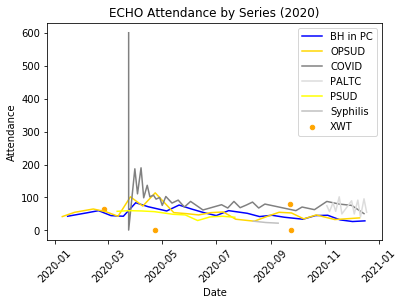

In [48]:
#plot the 2020 session attendance data using a multi-line graph

#slice the 2020 df by series
BH_PC_attendance_2020 = session_attendance_2020_df.loc[(session_attendance_2020_df['Clinic Name'] == 'BH in PC')]
bhpc_date_2020 = BH_PC_attendance_2020['Date'].to_list()
bhpc_attendance_2020 = BH_PC_attendance_2020['Attendance'].to_list()

OPSUD_attendance_2020 = session_attendance_2020_df.loc[(session_attendance_2020_df['Clinic Name'] == 'OPSUD')]
OPSUD_date_2020 = OPSUD_attendance_2020['Date'].to_list()
OPSUD_attendance_2020 = OPSUD_attendance_2020['Attendance'].to_list()

XWT_attendance_2020 = session_attendance_2020_df.loc[(session_attendance_2020_df['Clinic Name'] == 'XWT')]
XWT_date_2020 = XWT_attendance_2020['Date'].to_list()
XWT_attendance_2020 = XWT_attendance_2020['Attendance'].to_list()

COVID_attendance_2020 = session_attendance_2020_df.loc[(session_attendance_2020_df['Clinic Name'] == 'COVID')]
COVID_date_2020 = COVID_attendance_2020['Date'].to_list()
COVID_attendance_2020 = COVID_attendance_2020['Attendance'].to_list()

PALTC_attendance_2020 = session_attendance_2020_df.loc[(session_attendance_2020_df['Clinic Name'] == 'PALTC')]
PALTC_date_2020 = PALTC_attendance_2020['Date'].to_list()
PALTC_attendance_2020 = PALTC_attendance_2020['Attendance'].to_list()

PSUD_attendance_2020 = session_attendance_2020_df.loc[(session_attendance_2020_df['Clinic Name'] == 'PSUD')]
PSUD_date_2020 = PSUD_attendance_2020['Date'].to_list()
PSUD_attendance_2020 = PSUD_attendance_2020['Attendance'].to_list()

syphilis_attendance_2020 = session_attendance_2020_df.loc[(session_attendance_2020_df['Clinic Name'] == 'Syphilis')]
syphilis_date_2020 = syphilis_attendance_2020['Date'].to_list()
syphilis_attendance_2020 = syphilis_attendance_2020['Attendance'].to_list()
  
# plot lines
plt.plot(bhpc_date_2020, bhpc_attendance_2020, label = "BH in PC", color='blue')
plt.plot(OPSUD_date_2020, OPSUD_attendance_2020, label = "OPSUD", color='gold')
plt.scatter(XWT_date_2020, XWT_attendance_2020, label = "XWT", s=20, color='orange')

plt.plot(COVID_date_2020, COVID_attendance_2020, label = "COVID", color = 'gray')
plt.plot(PALTC_date_2020, PALTC_attendance_2020, label = "PALTC", color = 'gainsboro')
plt.plot(PSUD_date_2020, PSUD_attendance_2020, label = "PSUD", color = 'yellow')
plt.plot(syphilis_date_2020, syphilis_attendance_2020, label = "Syphilis", color = 'silver')

plt.title("ECHO Attendance by Series (2020)")
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

### NOTE: 
Because the sessions listed below are either data errors or outliars, another graph was made removing them from the dataset.
 3-24-2020 COVID-19 "Emergency Preparedness" (1 attendee)
 3-24-2020 COVID-19 "Patient Treatment Q & A" (600 attendees)
 4-23-2020 XWT (1 attendee)
 9-24-2020 XWT (1 attendee)

In [49]:
#Drop the duplicate X-Waiver sessions and the COVID-19 session kickoff (outliar) and redraw the chart

session_attendance_sans_outliars = session_attendance_2020_df[session_attendance_2020_df['Attendance'] > 1]
session_attendance_sans_outliars = session_attendance_sans_outliars[session_attendance_sans_outliars['Attendance'] < 599]
#session_attendance_sans_outliars

### Plot the 2020 Attendance Totals Sans Outliars

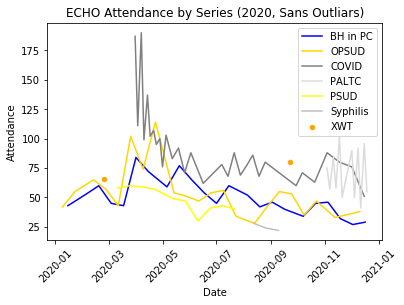

In [50]:
#plot the 2020 session attendance data using a multi-line graph

#slice the 2020 df by series
BH_PC_attendance_2020 = session_attendance_sans_outliars.loc[(session_attendance_sans_outliars['Clinic Name'] == 'BH in PC')]
bhpc_date_2020 = BH_PC_attendance_2020['Date'].to_list()
bhpc_attendance_2020 = BH_PC_attendance_2020['Attendance'].to_list()

OPSUD_attendance_2020 = session_attendance_sans_outliars.loc[(session_attendance_sans_outliars['Clinic Name'] == 'OPSUD')]
OPSUD_date_2020 = OPSUD_attendance_2020['Date'].to_list()
OPSUD_attendance_2020 = OPSUD_attendance_2020['Attendance'].to_list()

XWT_attendance_2020 = session_attendance_sans_outliars.loc[(session_attendance_sans_outliars['Clinic Name'] == 'XWT')]
XWT_date_2020 = XWT_attendance_2020['Date'].to_list()
XWT_attendance_2020 = XWT_attendance_2020['Attendance'].to_list()

COVID_attendance_2020 = session_attendance_sans_outliars.loc[(session_attendance_sans_outliars['Clinic Name'] == 'COVID')]
COVID_date_2020 = COVID_attendance_2020['Date'].to_list()
COVID_attendance_2020 = COVID_attendance_2020['Attendance'].to_list()

PALTC_attendance_2020 = session_attendance_sans_outliars.loc[(session_attendance_sans_outliars['Clinic Name'] == 'PALTC')]
PALTC_date_2020 = PALTC_attendance_2020['Date'].to_list()
PALTC_attendance_2020 = PALTC_attendance_2020['Attendance'].to_list()

PSUD_attendance_2020 = session_attendance_sans_outliars.loc[(session_attendance_sans_outliars['Clinic Name'] == 'PSUD')]
PSUD_date_2020 = PSUD_attendance_2020['Date'].to_list()
PSUD_attendance_2020 = PSUD_attendance_2020['Attendance'].to_list()

syphilis_attendance_2020 = session_attendance_sans_outliars.loc[(session_attendance_sans_outliars['Clinic Name'] == 'Syphilis')]
syphilis_date_2020 = syphilis_attendance_2020['Date'].to_list()
syphilis_attendance_2020 = syphilis_attendance_2020['Attendance'].to_list()
  
# plot lines
plt.plot(bhpc_date_2020, bhpc_attendance_2020, label = "BH in PC", color='blue')
plt.plot(OPSUD_date_2020, OPSUD_attendance_2020, label = "OPSUD", color='gold')
plt.scatter(XWT_date_2020, XWT_attendance_2020, label = "XWT", s=20, color='orange')

plt.plot(COVID_date_2020, COVID_attendance_2020, label = "COVID", color = 'gray')
plt.plot(PALTC_date_2020, PALTC_attendance_2020, label = "PALTC", color = 'gainsboro')
plt.plot(PSUD_date_2020, PSUD_attendance_2020, label = "PSUD", color = 'yellow')
plt.plot(syphilis_date_2020, syphilis_attendance_2020, label = "Syphilis", color = 'silver')

plt.title("ECHO Attendance by Series (2020, Sans Outliars)")
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

# 2021 Attendance Totals

In [51]:
#clean 2021 data in preparation for merging all the dfs into one

#list 2021 data column headers
print(iecho_data_2021.columns)

Index(['Date', 'Clinic Name', 'Session Topic', 'Full Name', 'First Name',
       'Last Name', 'Attendee Type', 'Job Title', 'Credentials', 'Specialty',
       'Attendee Street Address', 'Attendee City', 'Attendee State',
       'Attendee Zip Code', 'COPY', 'Attendee County', 'Attendee Email 1',
       'Attendee Email 2', 'Health Center Name',
       'Health Center Street Address', 'Health Center City',
       'Health Center State', 'Health Center Zip Code', 'Health Center County',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')


In [52]:
#eliminate unnecessary columns
iecho_data_2021 = iecho_data_2021.drop(['First Name',
                                        'Last Name',
                                        'COPY',
                                        'Health Center County',
                                        'Unnamed: 24', 
                                        'Unnamed: 25', 
                                        'Unnamed: 26'
                                       ], axis=1)

iecho_data_2021.head()

,Date,Clinic Name,Session Topic,Full Name,Attendee Type,Job Title,Credentials,Specialty,Attendee Street Address,Attendee City,Attendee State,Attendee Zip Code,Attendee County,Attendee Email 1,Attendee Email 2,Health Center Name,Health Center Street Address,Health Center City,Health Center State,Health Center Zip Code
0,1/5/2021,COVID-19 Ambulatory / Acute Care,Acute Complications of COVID-19,Amanda Bratton,Attendee,Counselor,LPC,NaN,"366 SW 5 Ave, Ste 100",Meridian,ID,83642,Ada / 4,amandaascentbhs@gmail.com,NaN,Ascent Behavioral Health,"366 SW 5 Ave, Ste 100",Meridian,ID,83642
1,1/5/2021,COVID-19 Ambulatory / Acute Care,Acute Complications of COVID-19,Ashley Carvalho,Attendee,Medical Resident,MD,NaN,777 N Raymond St,Boise,ID,83704,Ada / 4,ashley.carvalho@fmridaho.org,NaN,Family Medicine Residency of Idaho - Boise,777 N Raymond St,Boise,ID,83704
2,1/5/2021,COVID-19 Ambulatory / Acute Care,Acute Complications of COVID-19,Brooke Reche,Attendee,Other - Not Pt. Care,Other,NaN,"2976 E State St, Ste 120-34",Eagle,ID,83616,Ada / 4,brooke@lifechangeseldercare.com,NaN,Life Changes Elder Care Consulting LLC,"2976 E State St, Ste 120-34",Eagle,ID,83616
3,1/5/2021,COVID-19 Ambulatory / Acute Care,Acute Complications of COVID-19,Byron Brown,Attendee,Physician,MD,"ABIM, ABIM subspecialty Pulmonary Disease",7019 N Penncross Way,Meridian,ID,83646,Ada / 4,Bevbyro@msn.com,NaN,Guest - Meridan,NaN,Meridian,ID,83642
4,1/5/2021,COVID-19 Ambulatory / Acute Care,Acute Complications of COVID-19,Deb Roman,Attendee,Physician,DO,"Family Medicine, Integrative Medicine, Osteopa...","2717 W Bannock St, Ste 200",Boise,ID,83702,Ada / 4,drdebroman@finding-health.com,NaN,Finding Health,"2717 W Bannock St, Ste 200",Boise,ID,83702


In [53]:
# view the data
iecho_data_2021.describe()

,Date,Clinic Name,Session Topic,Full Name,Attendee Type,Job Title,Credentials,Specialty,Attendee Street Address,Attendee City,Attendee State,Attendee Zip Code,Attendee County,Attendee Email 1,Attendee Email 2,Health Center Name,Health Center Street Address,Health Center City,Health Center State,Health Center Zip Code
count,7868,7868,7868,7868,7868,7864,6330,2766,6551,7868,7868,6697,7769,7868,1010,7868,6317,7808,7808,7857
unique,141,12,158,1421,12,70,302,366,583,186,42,193,98,1451,248,630,447,176,40,189
top,6/29/2021,Behavioral Health in Primary Care,COVID-19 in Idaho: Summertime Steps to Prepare...,Karley Kline,Attendee,Social Worker,MD,Psychiatry,322 E Front St,Boise,ID,83702,Ada / 4,ssteffen@uidaho.edu,echoidaho@uidaho.edu,University of Idaho - Boise,322 E Front St,Boise,ID,83702
freq,176,1369,131,118,6784,1285,1003,153,457,2643,6056,1145,3722,120,66,624,642,2700,6012,1598


### Fill in Empty Values with NaNs

In [54]:
#print the column titles as a list
# print(iecho_data_2021.columns)

#add the list to the .apply method to fill in missing data with NaNs
iecho_data_2021 = iecho_data_2021[['Date', 'Clinic Name', 'Session Topic', 'Full Name', 'Attendee Type',
       'Job Title', 'Credentials', 'Specialty', 'Attendee Street Address',
       'Attendee City', 'Attendee State', 'Attendee Zip Code',
       'Attendee County', 'Attendee Email 1', 'Attendee Email 2',
       'Health Center Name', 'Health Center Street Address',
       'Health Center City', 'Health Center State', 'Health Center Zip Code']].apply(lambda x: x.str.strip()).replace('', np.nan)

iecho_data_2021['Clinic Name'].value_counts()

Behavioral Health in Primary Care                    1369
Opioids, Pain, and Substance Use Disorders           1233
Counseling Techniques for Substance Use Disorders    1222
COVID-19                                              881
COVID-19 Ambulatory / Acute Care                      829
COVID-19 Safety for Post-Acute and Long-Term Care     666
COVID-19 Nursing Home Safety- Friday Cohort           414
Hepatitis C                                           378
Perinatal SUD                                         363
Pediatric Behavioral Health                           362
X-Waiver Training                                      89
Nursing Home COVID-19 Safety                           62
Name: Clinic Name, dtype: int64

### Change the Series Names

In [55]:
#change the series data to match the terms of email_data in preparation for a merge
# iecho_data_2021['Clinic Name'].value_counts()

#convert 'Clinic Name' column to a string
# iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(str)

#change 'Behavioral Health in Primary Care' to 'BH in PC'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('Behavioral Health in Primary Care', 'BH in PC')

#change 'Opioids, Pain, and Substance Use Disorders' to 'OPSUD'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('Opioids, Pain, and Substance Use Disorders', 'OPSUD')

#change 'Counseling Techniques for Substance Use Disorders' to 'CTSUDs'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('Counseling Techniques for Substance Use Disorders', 'CTSUDs')

#change 'COVID-19' to 'COVID'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('COVID-19', 'COVID')

#change 'COVID-19 Ambulatory / Acute Care' to 'COVID'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('COVID-19 Ambulatory / Acute Care', 'COVID')

#change 'COVID-19 Safety for Post-Acute and Long-Term Care' to 'PALTC'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('COVID-19 Safety for Post-Acute and Long-Term Care', 'PALTC')

#change 'COVID-19 Nursing Home Safety - Friday Cohort' to 'PALTC'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('COVID-19 Nursing Home Safety- Friday Cohort', 'PALTC')

#change 'Hepatitis C' to 'VHLC'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('Hepatitis C', 'VHLC')

#change 'Perinatal SUD' to 'PSUD'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('Perinatal SUD', 'PSUD')

#change 'Pediatric Behavioral Health' to 'PBH'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('Pediatric Behavioral Health', 'PBH')

#change 'X-Waiver Training' to 'XWT'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('X-Waiver Training', 'XWT')

#change 'Nursing Home COVID-19 Safety' to 'PALTC'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('Nursing Home COVID-19 Safety', 'PALTC')

iecho_data_2021['Clinic Name'].value_counts()

# create a df that will show the attendance count by session

COVID       1710
BH in PC    1369
OPSUD       1233
CTSUDs      1222
PALTC       1142
VHLC         378
PSUD         363
PBH          362
XWT           89
Name: Clinic Name, dtype: int64

### Create a Session Attendance Dataframe

In [56]:
#create a new df that shows each session topic by series, date, and attendance per session
session_topics_2021 = iecho_data_2021[['Clinic Name', 'Session Topic', 'Full Name','Date']]
session_attendance_raw = session_topics_2021.groupby(['Clinic Name', 'Session Topic', 'Date'])['Full Name'].count()
session_attendance_2021_df = pd.DataFrame(session_attendance_raw)
#change the name of the 'Full Name' count to 'Attendance'
session_attendance_2021_df.rename(columns = {'Full Name':'Attendance'}, inplace=True)

#reset the index
session_attendance_2021_df.reset_index(inplace=True)

session_attendance_2021_df

,Clinic Name,Session Topic,Date,Attendance
0,BH in PC,Adult ADHD: Pharmacology,9/1/2021,48
1,BH in PC,Bipolar Disorder,2/3/2021,77
2,BH in PC,Bipolar Disorder: Pharmacology,2/17/2021,66
3,BH in PC,Case Collaboration: Tips and Tricks,3/17/2021,31
4,BH in PC,Considering COVID-19 as an ACE,10/6/2021,63
5,BH in PC,Differential Diagnosis Part I: Encephalopathy ...,11/3/2021,53
6,BH in PC,Differential Diagnosis Part II: Chronic Pain a...,11/17/2021,58
7,BH in PC,Dissociative Identity Disorder,5/19/2021,79
8,BH in PC,Eating Disorders 101,6/16/2021,67
9,BH in PC,Eating Disorders Part II,7/7/2021,55


### Convert the Datatypes

In [57]:
#change the data types of inappropriate datatypes, if necessary
# session_attendance_2021_df.dtypes
session_attendance_2021_df['Date'] = pd.to_datetime(session_attendance_2021_df['Date'], format='%m/%d/%Y')
# session_attendance_2021_df.dtypes

#reorder the df
session_attendance_2021_df = session_attendance_2021_df.sort_values(by='Date')

### Plot the 2021 Attendance Totals

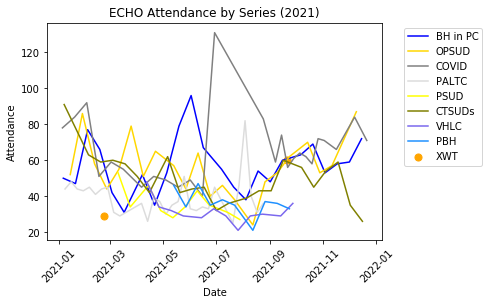

In [58]:
#plot the 2021 session attendance data using a multi-line graph

#slice the 2021 df by series
COVID_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'COVID')]
COVID_date_2021 = COVID_attendance_2021['Date'].to_list()
COVID_attendance_2021 = COVID_attendance_2021['Attendance'].to_list()

BH_PC_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'BH in PC')]
bhpc_date_2021 = BH_PC_attendance_2021['Date'].to_list()
bhpc_attendance_2021 = BH_PC_attendance_2021['Attendance'].to_list()

OPSUD_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'OPSUD')]
OPSUD_date_2021 = OPSUD_attendance_2021['Date'].to_list()
OPSUD_attendance_2021 = OPSUD_attendance_2021['Attendance'].to_list()

CTSUDs_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'CTSUDs')]
CTSUDs_date_2021 = CTSUDs_attendance_2021['Date'].to_list()
CTSUDs_attendance_2021 = CTSUDs_attendance_2021['Attendance'].to_list()

PALTC_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'PALTC')]
PALTC_date_2021 = PALTC_attendance_2021['Date'].to_list()
PALTC_attendance_2021 = PALTC_attendance_2021['Attendance'].to_list()

VHLC_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'VHLC')]
VHLC_date_2021 = VHLC_attendance_2021['Date'].to_list()
VHLC_attendance_2021 = VHLC_attendance_2021['Attendance'].to_list()

PSUD_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'PSUD')]
PSUD_date_2021 = PSUD_attendance_2021['Date'].to_list()
PSUD_attendance_2021 = PSUD_attendance_2021['Attendance'].to_list()

PBH_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'PBH')]
PBH_date_2021 = PBH_attendance_2021['Date'].to_list()
PBH_attendance_2021 = PBH_attendance_2021['Attendance'].to_list()

XWT_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'XWT')]
XWT_date_2021 = XWT_attendance_2021['Date'].to_list()
XWT_attendance_2021 = XWT_attendance_2021['Attendance'].to_list()

# plot lines
plt.plot(bhpc_date_2021, bhpc_attendance_2021, label = "BH in PC", color='blue')
plt.plot(OPSUD_date_2021, OPSUD_attendance_2021, label = "OPSUD", color='gold')
plt.scatter(XWT_date_2021, XWT_attendance_2021, label = "XWT", s=50, color='orange')
plt.plot(COVID_date_2021, COVID_attendance_2021, label = "COVID", color = 'gray')
plt.plot(PALTC_date_2021, PALTC_attendance_2021, label = "PALTC", color = 'gainsboro')
plt.plot(PSUD_date_2021, PSUD_attendance_2021, label = "PSUD", color = 'yellow')
# plt.plot(syphilis_date, syphilis_attendance, label = "Syphilis", color = 'silver')

plt.plot(CTSUDs_date_2021, CTSUDs_attendance_2021, label = "CTSUDs", color = 'olive')
plt.plot(VHLC_date_2021, VHLC_attendance_2021, label = "VHLC", color = 'mediumslateblue')
plt.plot(PBH_date_2021, PBH_attendance_2021, label = "PBH", color = 'dodgerblue')

plt.title("ECHO Attendance by Series (2021)")
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

# Merged Data: The Impact of Email Marketing on Session Attendance

In [59]:
# merge all the cleaned dataframes to get one df that will show cumulative attendance
# session_attendance_cumulative = session_attendance_2018_df.append([session_attendance_2019_df, session_attendance_2020_df, session_attendance_2021_df], ignore_index=False, verify_integrity=False, sort=False)
# session_attendance_cumulative

In [60]:
#export this df to a csv file
# session_attendance_cumulative.to_csv(r'c:\\Users\\ssteffen\\University of Idaho\\
# Storage-Boise - ECHO\\Staff\\Sam\\Data\\Spreadsheets\\iECHO data\\2018-2021_iECHO_
# attendance_data.csv', index=False)

#read in the cumulative attendance data from the saved '2018-2021_iECHO_attendance_data.csv'
#this data can now be accessed using the following variable: 
iecho_data_cumulative.head()

,Clinic Name,Session Topic,Date,Attendance
0,BH in PC,"Boundaries, Therapeutic Modalities, and Therap...",11/14/2018,30
1,BH in PC,Co-Occurring Disorders,10/17/2018,37
2,BH in PC,Common Interactions and Dosage Considerations ...,11/28/2018,30
3,BH in PC,Gender Dysphoria,10/3/2018,45
4,BH in PC,Geriatric Psychiatry and Considerations in the...,10/31/2018,30


In [61]:
#change the data types of inappropriate datatypes, if necessary
# iecho_data_cumulative.dtypes
iecho_data_cumulative['Date'] = pd.to_datetime(iecho_data_cumulative['Date'], format='%m/%d/%Y')
# iecho_data_cumulative.dtypes

#reorder the df
iecho_data_cumulative = iecho_data_cumulative.sort_values(by='Date')
iecho_data_cumulative

,Clinic Name,Session Topic,Date,Attendance
14,OPSUD,ECHO for Addressing Opioid Addiction and Treat...,2018-03-15,30
11,OPSUD,CDC Guidelines for Prescribing Opioids for Chr...,2018-03-29,22
12,OPSUD,CDC Guidelines for Prescribing Opioids for Chr...,2018-04-12,27
22,OPSUD,"Taking a Pain History: Functional Assessment, ...",2018-04-26,20
21,OPSUD,Opioid Use Disorder and Evidence-Based Screening,2018-05-10,17
19,OPSUD,Non-Pharmaceutical Treatment for Chronic Pain,2018-05-24,21
9,OPSUD,Addiction Treatment Overview,2018-06-07,21
25,OPSUD,Use of the Prescription Monitoring Program and...,2018-06-21,31
10,OPSUD,Buprenorphine in Primary Care,2018-07-19,24
17,OPSUD,Medical Cannabis for Chronic Pain,2018-08-02,29


In [62]:
# find the number of recipients for each day-of email
email_data_df

,Date,Weekday,Time,Series,Type,Title,Subject,Total Recipients,Successful Deliveries,Total Bounces,...,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,FB Likes,Visits,New Visits,Pages/Visit,Bounce Rate,Times
0,2018-03-13,Tuesday,14:59:00,BH in PC,Daily,WWAMI - ECHO - 3/15 Reminder,ECHO Idaho Opioid Clinic Thursday,1,1,0.0,...,0,0.00,0,0,0.0,0.0,0.0,0.000000,0.00,14:59:00
1,2018-03-13,Tuesday,16:28:00,BH in PC,Daily,WWAMI - ECHO - 3/15 Reminder to Enrolled,ECHO Idaho Opioid Clinic Thursday,55,55,0.0,...,20,0.36,73,0,0.0,1.0,0.0,5.000000,0.00,16:28:00
2,2018-05-30,Wednesday,8:11:00,BH in PC,Daily,WWAMI - ECHO - EnrollConfirm 05-30-18,Enrollment Confirmation: ECHO IdahoÃ¢â‚¬â„¢s O...,6,5,1.0,...,2,0.40,2,0,0.0,0.0,0.0,0.000000,0.00,08:11:00
3,2018-07-20,Friday,10:04:00,BH in PC,Special - General,WWAMI - ECHO - Behavioral Health Announcement,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,39,39,0.0,...,7,0.18,49,0,0.0,20.0,7.0,4.400000,0.40,10:04:00
4,2018-07-20,Friday,11:16:00,BH in PC,Special - General,WWAMI - ECHO - Behavioral Health Announcement ...,Announcing ECHO IdahoÃ¢â‚¬â„¢s Behavioral Heal...,4,4,0.0,...,0,0.00,0,0,0.0,0.0,0.0,0.000000,0.00,11:16:00
5,2018-08-01,Wednesday,10:40:00,BH in PC,Daily,WWAMI - ECHO - Behavioral Health Registration ...,Registration Now Open for ECHO IdahoÃ¢â‚¬â„¢s ...,185,182,3.0,...,33,0.18,91,1,0.0,64.0,19.0,2.531250,0.47,10:40:00
6,2018-09-04,Tuesday,8:00:00,BH in PC,Daily,WWAMI - ECHO - 09-05 BH Reminder,ECHO Idaho Behavioral Health in Primary Care S...,59,59,0.0,...,27,0.46,93,0,0.0,9.0,3.0,5.222222,0.33,08:00:00
7,2018-09-05,Wednesday,8:39:00,BH in PC,Daily,WWAMI - ECHO - 09-05 BH Reminder 2,ECHO Idaho Behavioral Health in Primary Care S...,59,54,5.0,...,28,0.52,90,0,0.0,0.0,0.0,0.000000,0.00,08:39:00
8,2018-09-18,Tuesday,8:26:00,BH in PC,Daily,WWAMI - ECHO - 09-18 BH Reminder,ECHO Idaho Behavioral Health in Primary Care S...,57,55,2.0,...,18,0.33,36,0,0.0,3.0,1.0,1.333333,0.67,08:26:00
9,2018-09-19,Wednesday,8:28:00,BH in PC,Daily,WWAMI - ECHO - 09-18 BH Reminder (copy 01),ECHO Idaho Behavioral Health in Primary Care S...,57,55,2.0,...,24,0.44,57,0,0.0,0.0,0.0,0.000000,0.00,08:28:00


In [63]:
#show column headers as a list
list(email_data_df.columns)

['Date',
 'Weekday',
 'Time',
 'Series',
 'Type',
 'Title',
 'Subject',
 'Total Recipients',
 'Successful Deliveries',
 'Total Bounces',
 'Times Forwarded',
 'Forwarded Opens',
 'Unique Opens',
 'Open Rate',
 'Total Opens',
 'Unique Clicks',
 'Click Rate',
 'Total Clicks',
 'Unsubscribes',
 'FB Likes',
 'Visits',
 'New Visits',
 'Pages/Visit',
 'Bounce Rate',
 'Times']

### Create a df for Daily Email Data

In [64]:
#create a new df with only relevant info
emails_df = email_data_df[['Date', 'Series', 'Type', 'Successful Deliveries', 'Times Forwarded', 'Unique Opens', 'Open Rate', 'Total Opens']]
daily_emails_df = emails_df[emails_df['Type'] == 'Daily']
daily_emails_df

,Date,Series,Type,Successful Deliveries,Times Forwarded,Unique Opens,Open Rate,Total Opens
0,2018-03-13,BH in PC,Daily,1,0.0,1,1.00,1
1,2018-03-13,BH in PC,Daily,55,0.0,35,0.64,290
2,2018-05-30,BH in PC,Daily,5,0.0,5,1.00,10
5,2018-08-01,BH in PC,Daily,182,0.0,80,0.44,999
6,2018-09-04,BH in PC,Daily,59,0.0,39,0.66,165
7,2018-09-05,BH in PC,Daily,54,0.0,39,0.72,146
8,2018-09-18,BH in PC,Daily,55,0.0,34,0.62,104
9,2018-09-19,BH in PC,Daily,55,0.0,35,0.64,204
10,2018-10-03,BH in PC,Daily,55,0.0,35,0.64,123
11,2018-10-17,BH in PC,Daily,55,0.0,35,0.64,92


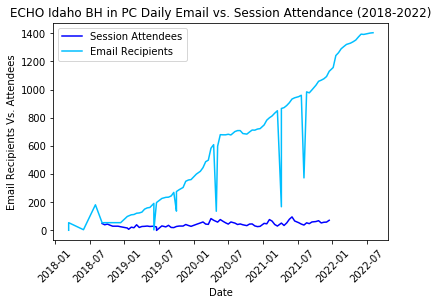

In [65]:
#Plot Cumulative (2018-2022) BH in PC series data, Session Attendance vs. Daily Email Recipients
#get variables to plot email data
bh_dailys = daily_emails_df.loc[(daily_emails_df['Series'] == 'BH in PC')]
bh_dailys = bh_dailys.sort_values(by='Date')
bh_email_date = bh_dailys['Date'].to_list()
bh_email_recips = bh_dailys['Successful Deliveries'].to_list()

#get variables to plot cumulative attendance data
bh_pc_cumulative = iecho_data_cumulative.loc[(iecho_data_cumulative['Clinic Name'] == 'BH in PC')]
bh_pc_dates_cumulative = bh_pc_cumulative['Date'].to_list()
bh_pc_attendees_cumulative = bh_pc_cumulative['Attendance'].to_list()

# plot the cumulative attendance in a line graph
plt.plot(bh_pc_dates_cumulative, bh_pc_attendees_cumulative, label = 'Session Attendees', color='blue')

# add the cumulative email data as a line graph
plt.plot(bh_email_date, bh_email_recips, label = 'Email Recipients', color='deepskyblue')

plt.title("ECHO Idaho BH in PC Daily Email vs. Session Attendance (2018-2022)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

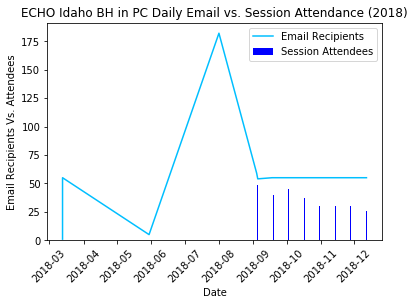

In [66]:
#Plot 2018 BH in PC series data, Session Attendance vs. Daily Email Recipients
bh_dailys_2018 = daily_emails_df.loc[(daily_emails_df['Series'] == 'BH in PC') & (daily_emails_df['Date'] < '2019-01-01')]
bh_2018_email_date = bh_dailys_2018['Date'].to_list()
bh_2018_email_recips = bh_dailys_2018['Successful Deliveries'].to_list()

#Recall attendance plot from above, change "plot" to "bar"
plt.bar(bhpc_date_2018, bhpc_attendance_2018, label = "Session Attendees", color='blue')

#add the new plots as a line graph from email data
plt.plot(bh_2018_email_date, bh_2018_email_recips, label = "Email Recipients", color='deepskyblue')

plt.title("ECHO Idaho BH in PC Daily Email vs. Session Attendance (2018)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

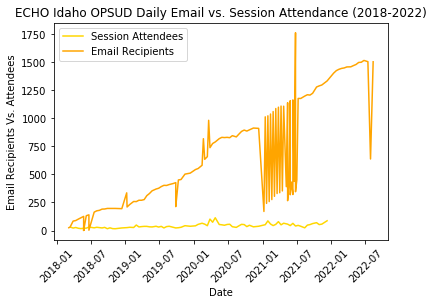

In [67]:
#Plot Cumulative (2018-2022) OPSUD series data, Session Attendance vs. Daily Email Recipients
#get variables to plot email data
opsud_dailys = daily_emails_df.loc[(daily_emails_df['Series'] == 'OPSUD')]
opsud_dailys = opsud_dailys.sort_values(by='Date')
opsud_email_date = opsud_dailys['Date'].to_list()
opsud_email_recips = opsud_dailys['Successful Deliveries'].to_list()

#get variables to plot cumulative attendance data
opsud_cumulative = iecho_data_cumulative.loc[(iecho_data_cumulative['Clinic Name'] == 'OPSUD')]
opsud_dates_cumulative = opsud_cumulative['Date'].to_list()
opsud_attendees_cumulative = opsud_cumulative['Attendance'].to_list()

# plot the cumulative attendance in a line graph
plt.plot(opsud_dates_cumulative, opsud_attendees_cumulative, label = 'Session Attendees', color='gold')

# add the cumulative email data as a line graph
plt.plot(opsud_email_date, opsud_email_recips, label = 'Email Recipients', color='orange')

plt.title("ECHO Idaho OPSUD Daily Email vs. Session Attendance (2018-2022)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

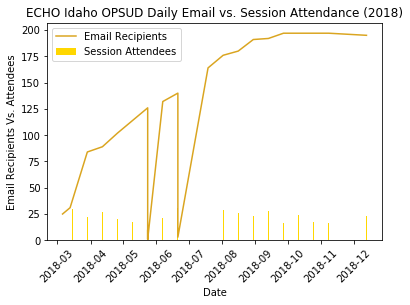

In [68]:
#Plot 2018 OPSUD series data, Session Attendance vs. Daily Email Recipients
#for each series, by year, create variables to plot the email data in a line graph
opsud_dailys_2018 = daily_emails_df.loc[(daily_emails_df['Series'] == 'OPSUD') & (daily_emails_df['Date'] < '2019-01-01')]
opsud_2018_email_date = opsud_dailys_2018['Date'].to_list()
opsud_2018_email_recips = opsud_dailys_2018['Successful Deliveries'].to_list()

#Recall attendance plot from above, change "plot" to "bar"
plt.bar(OPSUD_date_2018, OPSUD_attendance_2018, label = "Session Attendees", color='gold')

#add the new plots as a line graph from email data
plt.plot(opsud_2018_email_date, opsud_2018_email_recips, label = "Email Recipients", color='goldenrod')

plt.title("ECHO Idaho OPSUD Daily Email vs. Session Attendance (2018)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

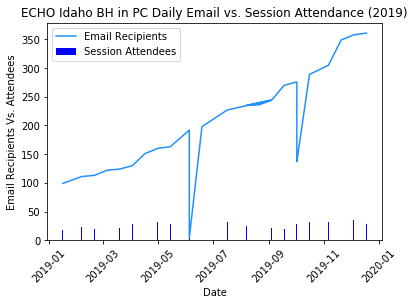

In [69]:
#Plot 2019 BH in PC series data, Session Attendance vs. Daily Email Recipients
#for each series, by year, create variables to plot the email data in a line graph
dailys_2019 = daily_emails_df.loc[(daily_emails_df['Date'] > '2019-01-01') & (daily_emails_df['Date'] < '2019-12-31')]
bhpc_dailys_2019 = dailys_2019.loc[(dailys_2019['Series'] == 'BH in PC')]
bhpc_2019_email_date = bhpc_dailys_2019['Date'].to_list()
bhpc_2019_email_recips = bhpc_dailys_2019['Successful Deliveries'].to_list()

#Recall attendance plot from above, change "plot" to "bar"
plt.bar(bhpc_date_2019, bhpc_attendance_2019, label = "Session Attendees", color='blue')

#add the new plots as a line graph from email data
plt.plot(bhpc_2019_email_date, bhpc_2019_email_recips, label = "Email Recipients", color='dodgerblue')

plt.title("ECHO Idaho BH in PC Daily Email vs. Session Attendance (2019)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

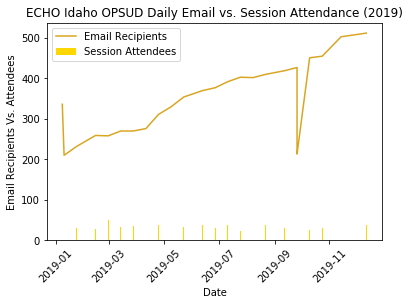

In [70]:
#Plot 2019 OPSUD series data, Session Attendance vs. Daily Email Recipients
#for each series, by year, create variables to plot the email data in a line graph
#dailys_2019 df is created in the cell above
opsud_dailys_2019 = dailys_2019.loc[(dailys_2019['Series'] == 'OPSUD')]
opsud_2019_email_date = opsud_dailys_2019['Date'].to_list()
opsud_2019_email_recips = opsud_dailys_2019['Successful Deliveries'].to_list()

#Recall attendance plot from above, change "plot" to "bar"
plt.bar(OPSUD_date_2019, OPSUD_attendance_2019, label = "Session Attendees", color='gold')

#add the new plots as a line graph from email data
plt.plot(opsud_2019_email_date, opsud_2019_email_recips, label = "Email Recipients", color='goldenrod')

plt.title("ECHO Idaho OPSUD Daily Email vs. Session Attendance (2019)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

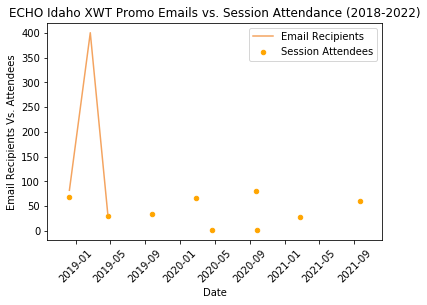

In [71]:
#This chart needs fixin:
#retrieve and plot the total number of emails by type "XWT Promo"

#Plot Cumulative (2018-2022) XWT series data, Session Attendance vs. Daily Email Recipients
#get variables to plot email data
XWT_promos = daily_emails_df.loc[(daily_emails_df['Series'] == 'XWT')]
XWT_promos = XWT_promos.sort_values(by='Date')
XWT_email_date = XWT_promos['Date'].to_list()
XWT_email_recips = XWT_promos['Successful Deliveries'].to_list()

#get variables to plot cumulative attendance data
XWT_cumulative = iecho_data_cumulative.loc[(iecho_data_cumulative['Clinic Name'] == 'XWT')]
XWT_dates_cumulative = XWT_cumulative['Date'].to_list()
XWT_attendees_cumulative = XWT_cumulative['Attendance'].to_list()

# plot the cumulative attendance in a line graph
plt.scatter(XWT_dates_cumulative, XWT_attendees_cumulative, label = 'Session Attendees', s=20, color='orange')

# add the cumulative email data as a line graph
plt.plot(XWT_email_date, XWT_email_recips, label = 'Email Recipients', color='sandybrown')

plt.title("ECHO Idaho XWT Promo Emails vs. Session Attendance (2018-2022)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

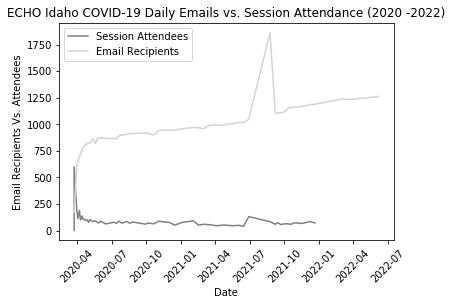

In [72]:
#Plot Cumulative (2018-2022) COVID series data, Session Attendance vs. Daily Email Recipients
#get variables to plot email data
COVID_dailys = daily_emails_df.loc[(daily_emails_df['Series'] == 'COVID')]
COVID_dailys = COVID_dailys.sort_values(by='Date')
COVID_email_date = COVID_dailys['Date'].to_list()
COVID_email_recips = COVID_dailys['Successful Deliveries'].to_list()

#get variables to plot cumulative attendance data
COVID_cumulative = iecho_data_cumulative.loc[(iecho_data_cumulative['Clinic Name'] == 'COVID')]
COVID_dates_cumulative = COVID_cumulative['Date'].to_list()
COVID_attendees_cumulative = COVID_cumulative['Attendance'].to_list()

# plot the cumulative attendance in a line graph
plt.plot(COVID_dates_cumulative, COVID_attendees_cumulative, label = 'Session Attendees', color='grey')

# add the cumulative email data as a line graph
plt.plot(COVID_email_date, COVID_email_recips, label = 'Email Recipients', color='lightgray')

plt.title("ECHO Idaho COVID-19 Daily Emails vs. Session Attendance (2020 -2022)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

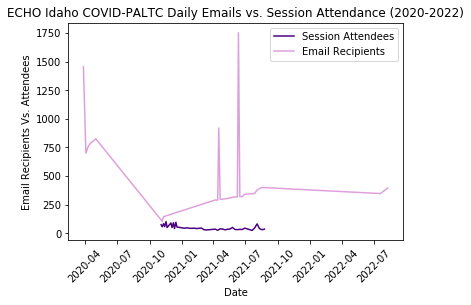

In [73]:
#Plot Cumulative (2018-2022) PALTC series data, Session Attendance vs. Daily Email Recipients
#get variables to plot email data
PALTC_dailys = daily_emails_df.loc[(daily_emails_df['Series'] == 'PALTC')]
PALTC_dailys = PALTC_dailys.sort_values(by='Date')
PALTC_email_date = PALTC_dailys['Date'].to_list()
PALTC_email_recips = PALTC_dailys['Successful Deliveries'].to_list()

#get variables to plot cumulative attendance data
PALTC_cumulative = iecho_data_cumulative.loc[(iecho_data_cumulative['Clinic Name'] == 'PALTC')]
PALTC_dates_cumulative = PALTC_cumulative['Date'].to_list()
PALTC_attendees_cumulative = PALTC_cumulative['Attendance'].to_list()

# plot the cumulative attendance in a line graph
plt.plot(PALTC_dates_cumulative, PALTC_attendees_cumulative, label = 'Session Attendees', color='indigo')

# add the cumulative email data as a line graph
plt.plot(PALTC_email_date, PALTC_email_recips, label = 'Email Recipients', color='plum')

plt.title("ECHO Idaho COVID-PALTC Daily Emails vs. Session Attendance (2020-2022)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

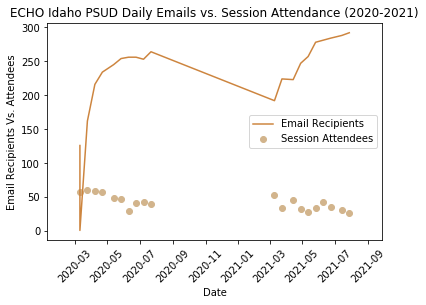

In [74]:
#Plot Cumulative (2020-2021) PSUD series data, Session Attendance vs. Daily Email Recipients
#get variables to plot email data
PSUD_dailys = daily_emails_df.loc[(daily_emails_df['Series'] == 'PSUD')]
PSUD_dailys = PSUD_dailys.sort_values(by='Date')
PSUD_email_date = PSUD_dailys['Date'].to_list()
PSUD_email_recips = PSUD_dailys['Successful Deliveries'].to_list()

#get variables to plot cumulative attendance data
PSUD_cumulative = iecho_data_cumulative.loc[(iecho_data_cumulative['Clinic Name'] == 'PSUD')]
PSUD_dates_cumulative = PSUD_cumulative['Date'].to_list()
PSUD_attendees_cumulative = PSUD_cumulative['Attendance'].to_list()

# plot the cumulative attendance in a line graph
plt.scatter(PSUD_dates_cumulative, PSUD_attendees_cumulative, label = 'Session Attendees', color='tan')

# add the cumulative email data as a line graph
plt.plot(PSUD_email_date, PSUD_email_recips, label = 'Email Recipients', color='peru')

plt.title("ECHO Idaho PSUD Daily Emails vs. Session Attendance (2020-2021)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

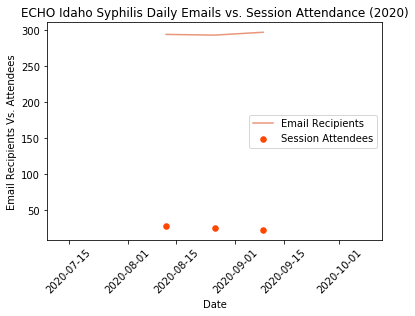

In [75]:
#Plot Cumulative (2020) Syphilis series data, Session Attendance vs. Daily Email Recipients
#get variables to plot email data
syphilis_dailys = daily_emails_df.loc[(daily_emails_df['Series'] == 'Syphilis')]
syphilis_dailys = syphilis_dailys.sort_values(by='Date')
syphilis_email_date = syphilis_dailys['Date'].to_list()
syphilis_email_recips = syphilis_dailys['Successful Deliveries'].to_list()

#get variables to plot cumulative attendance data
syphilis_cumulative = iecho_data_cumulative.loc[(iecho_data_cumulative['Clinic Name'] == 'Syphilis')]
syphilis_dates_cumulative = syphilis_cumulative['Date'].to_list()
syphilis_attendees_cumulative = syphilis_cumulative['Attendance'].to_list()

# plot the cumulative attendance in a line graph
plt.scatter(syphilis_dates_cumulative, syphilis_attendees_cumulative, label = 'Session Attendees', s=30, color='orangered')

# add the cumulative email data as a line graph
plt.plot(syphilis_email_date, syphilis_email_recips, label = 'Email Recipients', color='darksalmon')

plt.title("ECHO Idaho Syphilis Daily Emails vs. Session Attendance (2020)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

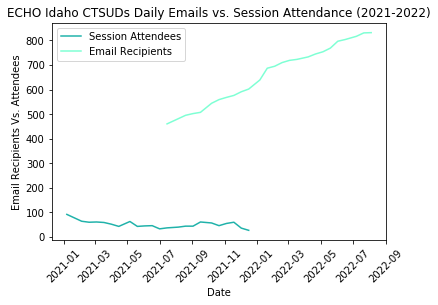

In [76]:
#Plot Cumulative CTSUDs series data, Session Attendance vs. Daily Email Recipients
#get variables to plot email data
ctsuds_dailys = daily_emails_df.loc[(daily_emails_df['Series'] == 'CTSUDs')]
ctsuds_dailys = ctsuds_dailys.sort_values(by='Date')
ctsuds_email_date = ctsuds_dailys['Date'].to_list()
ctsuds_email_recips = ctsuds_dailys['Successful Deliveries'].to_list()

#get variables to plot cumulative attendance data
ctsuds_cumulative = iecho_data_cumulative.loc[(iecho_data_cumulative['Clinic Name'] == 'CTSUDs')]
ctsuds_dates_cumulative = ctsuds_cumulative['Date'].to_list()
ctsuds_attendees_cumulative = ctsuds_cumulative['Attendance'].to_list()

# plot the cumulative attendance in a line graph
plt.plot(ctsuds_dates_cumulative, ctsuds_attendees_cumulative, label = 'Session Attendees', color='lightseagreen')

# add the cumulative email data as a line graph
plt.plot(ctsuds_email_date, ctsuds_email_recips, label = 'Email Recipients', color='aquamarine')

plt.title("ECHO Idaho CTSUDs Daily Emails vs. Session Attendance (2021-2022)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

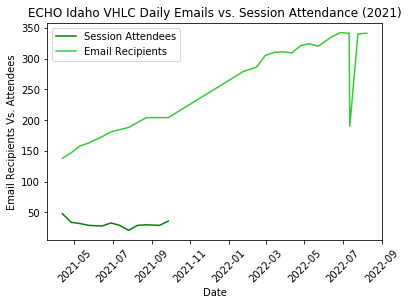

In [77]:
#Plot Cumulative VHLC series data, Session Attendance vs. Daily Email Recipients
#get variables to plot email data
VHLC_dailys = daily_emails_df.loc[(daily_emails_df['Series'] == 'VHLC')]
VHLC_dailys = VHLC_dailys.sort_values(by='Date')
VHLC_email_date = VHLC_dailys['Date'].to_list()
VHLC_email_recips = VHLC_dailys['Successful Deliveries'].to_list()

#get variables to plot cumulative attendance data
VHLC_cumulative = iecho_data_cumulative.loc[(iecho_data_cumulative['Clinic Name'] == 'VHLC')]
VHLC_dates_cumulative = VHLC_cumulative['Date'].to_list()
VHLC_attendees_cumulative = VHLC_cumulative['Attendance'].to_list()

# plot the cumulative attendance in a line graph
plt.plot(VHLC_dates_cumulative, VHLC_attendees_cumulative, label = 'Session Attendees', color='green')

# add the cumulative email data as a line graph
plt.plot(VHLC_email_date, VHLC_email_recips, label = 'Email Recipients', color='limegreen')

plt.title("ECHO Idaho VHLC Daily Emails vs. Session Attendance (2021)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

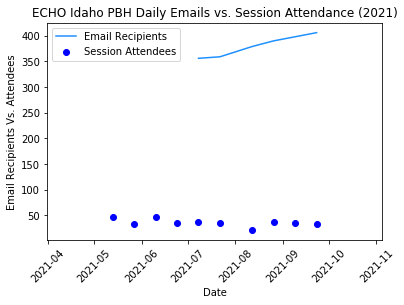

In [78]:
#Plot Cumulative PBH series data, Session Attendance vs. Daily Email Recipients
#get variables to plot email data
PBH_dailys = daily_emails_df.loc[(daily_emails_df['Series'] == 'PBH')]
PBH_dailys = PBH_dailys.sort_values(by='Date')
PBH_email_date = PBH_dailys['Date'].to_list()
PBH_email_recips = PBH_dailys['Successful Deliveries'].to_list()

#get variables to plot cumulative attendance data
PBH_cumulative = iecho_data_cumulative.loc[(iecho_data_cumulative['Clinic Name'] == 'PBH')]
PBH_dates_cumulative = PBH_cumulative['Date'].to_list()
PBH_attendees_cumulative = PBH_cumulative['Attendance'].to_list()

# plot the cumulative attendance in a line graph
plt.scatter(PBH_dates_cumulative, PBH_attendees_cumulative, label = 'Session Attendees', color='blue')

# add the cumulative email data as a line graph
plt.plot(PBH_email_date, PBH_email_recips, label = 'Email Recipients', color='dodgerblue')

plt.title("ECHO Idaho PBH Daily Emails vs. Session Attendance (2021)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

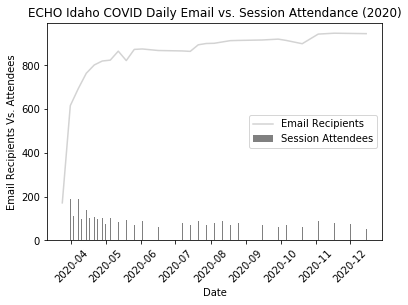

In [79]:
#Plot 2020 COVID series data, Session Attendance vs. Daily Email Recipients
#for each series, by year, create variables to plot the email data in a line graph
dailys_2020 = daily_emails_df.loc[(daily_emails_df['Date'] > '2020-01-01') & (daily_emails_df['Date'] < '2020-12-31')]
COVID_dailys_2020 = dailys_2020.loc[(dailys_2020['Series'] == 'COVID')]
COVID_2020_email_date = COVID_dailys_2020['Date'].to_list()
COVID_2020_email_recips = COVID_dailys_2020['Successful Deliveries'].to_list()

#Recall attendance plot from above, change "plot" to "bar"
plt.bar(COVID_date_2020, COVID_attendance_2020, label = "Session Attendees", color='gray')

#add the new plots as a line graph from email data
plt.plot(COVID_2020_email_date, COVID_2020_email_recips, label = "Email Recipients", color='lightgray')

plt.title("ECHO Idaho COVID Daily Email vs. Session Attendance (2020)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

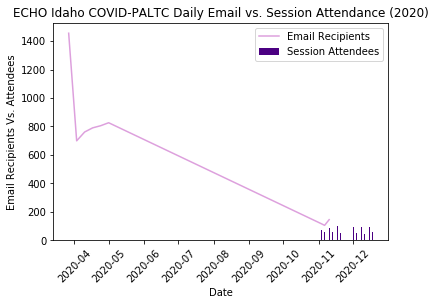

In [80]:
#Plot 2020 PALTC series data, Session Attendance vs. Daily Email Recipients
#for each series, by year, create variables to plot the email data in a line graph
dailys_2020 = daily_emails_df.loc[(daily_emails_df['Date'] > '2020-01-01') & (daily_emails_df['Date'] < '2020-12-31')]
PALTC_dailys_2020 = dailys_2020.loc[(dailys_2020['Series'] == 'PALTC')]
PALTC_2020_email_date = PALTC_dailys_2020['Date'].to_list()
PALTC_2020_email_recips = PALTC_dailys_2020['Successful Deliveries'].to_list()

#Recall attendance plot from above, change "plot" to "bar"
plt.bar(PALTC_date_2020, PALTC_attendance_2020, label = "Session Attendees", color='indigo')

#add the new plots as a line graph from email data
plt.plot(PALTC_2020_email_date, PALTC_2020_email_recips, label = "Email Recipients", color='plum')

plt.title("ECHO Idaho COVID-PALTC Daily Email vs. Session Attendance (2020)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

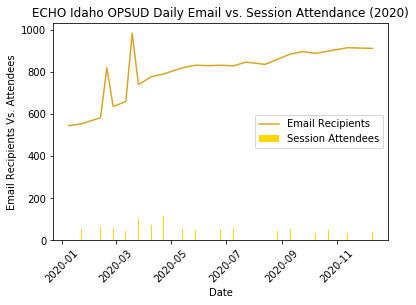

In [81]:
#Plot 2020 OPSUD series data, Session Attendance vs. Daily Email Recipients
#for each series, by year, create variables to plot the email data in a line graph
dailys_2020 = daily_emails_df.loc[(daily_emails_df['Date'] > '2020-01-01') & (daily_emails_df['Date'] < '2020-12-31')]
opsud_dailys_2020 = dailys_2020.loc[(dailys_2020['Series'] == 'OPSUD')]
opsud_2020_email_date = opsud_dailys_2020['Date'].to_list()
opsud_2020_email_recips = opsud_dailys_2020['Successful Deliveries'].to_list()

#Recall attendance plot from above, change "plot" to "bar"
plt.bar(OPSUD_date_2020, OPSUD_attendance_2020, label = "Session Attendees", color='gold')

#add the new plots as a line graph from email data
plt.plot(opsud_2020_email_date, opsud_2020_email_recips, label = "Email Recipients", color='goldenrod')

plt.title("ECHO Idaho OPSUD Daily Email vs. Session Attendance (2020)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

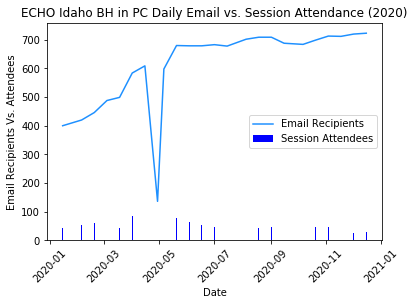

In [82]:
#Plot 2020 BH in PC series data, Session Attendance vs. Daily Email Recipients
#for each series, by year, create variables to plot the email data in a line graph
dailys_2020 = daily_emails_df.loc[(daily_emails_df['Date'] > '2020-01-01') & (daily_emails_df['Date'] < '2020-12-31')]
bhpc_dailys_2020 = dailys_2020.loc[(dailys_2020['Series'] == 'BH in PC')]
bhpc_2020_email_date = bhpc_dailys_2020['Date'].to_list()
bhpc_2020_email_recips = bhpc_dailys_2020['Successful Deliveries'].to_list()

#Recall attendance plot from above, change "plot" to "bar"
plt.bar(bhpc_date_2020, bhpc_attendance_2020, label = "Session Attendees", color='blue')

#add the new plots as a line graph from email data
plt.plot(bhpc_2020_email_date, bhpc_2020_email_recips, label = "Email Recipients", color='dodgerblue')

plt.title("ECHO Idaho BH in PC Daily Email vs. Session Attendance (2020)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

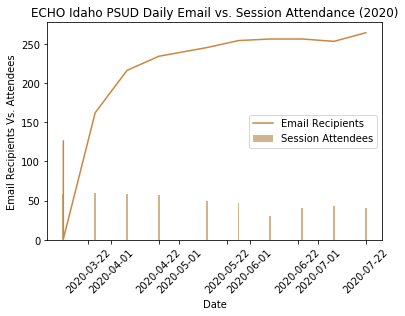

In [83]:
#Plot 2020 PSUD series data, Session Attendance vs. Daily Email Recipients
#for each series, by year, create variables to plot the email data in a line graph
dailys_2020 = daily_emails_df.loc[(daily_emails_df['Date'] > '2020-01-01') & (daily_emails_df['Date'] < '2020-12-31')]
PSUD_dailys_2020 = dailys_2020.loc[(dailys_2020['Series'] == 'PSUD')]
PSUD_2020_email_date = PSUD_dailys_2020['Date'].to_list()
PSUD_2020_email_recips = PSUD_dailys_2020['Successful Deliveries'].to_list()

#Recall attendance plot from above, change "plot" to "bar"
plt.bar(PSUD_date_2020, PSUD_attendance_2020, label = "Session Attendees", color='tan')

#add the new plots as a line graph from email data
plt.plot(PSUD_2020_email_date, PSUD_2020_email_recips, label = "Email Recipients", color='peru')

plt.title("ECHO Idaho PSUD Daily Email vs. Session Attendance (2020)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

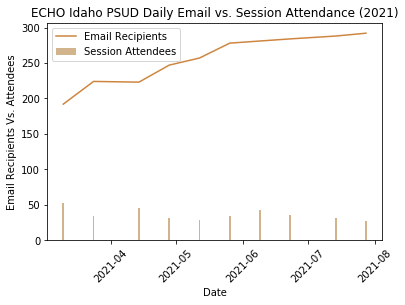

In [84]:
#Plot 2021 PSUD series data, Session Attendance vs. Daily Email Recipients
#for each series, by year, create variables to plot the email data in a line graph
dailys_2021 = daily_emails_df.loc[(daily_emails_df['Date'] > '2021-01-01') & (daily_emails_df['Date'] < '2021-12-31')]
PSUD_dailys_2021 = dailys_2021.loc[(dailys_2021['Series'] == 'PSUD')]
PSUD_2021_email_date = PSUD_dailys_2021['Date'].to_list()
PSUD_2021_email_recips = PSUD_dailys_2021['Successful Deliveries'].to_list()

#Recall attendance plot from above, change "plot" to "bar"
plt.bar(PSUD_date_2021, PSUD_attendance_2021, label = "Session Attendees", color='tan')

#add the new plots as a line graph from email data
plt.plot(PSUD_2021_email_date, PSUD_2021_email_recips, label = "Email Recipients", color='peru')

plt.title("ECHO Idaho PSUD Daily Email vs. Session Attendance (2021)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

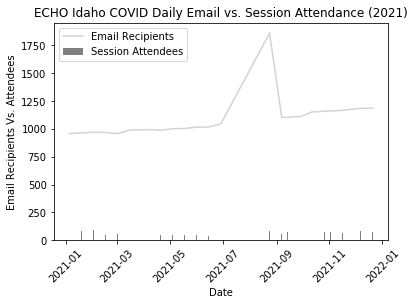

In [85]:
#Plot 2021 COVID series data, Session Attendance vs. Daily Email Recipients
#for each series, by year, create variables to plot the email data in a line graph
dailys_2021 = daily_emails_df.loc[(daily_emails_df['Date'] > '2021-01-01') & (daily_emails_df['Date'] < '2021-12-31')]
COVID_dailys_2021 = dailys_2021.loc[(dailys_2021['Series'] == 'COVID')]
COVID_2021_email_date = COVID_dailys_2021['Date'].to_list()
COVID_2021_email_recips = COVID_dailys_2021['Successful Deliveries'].to_list()

#Recall attendance plot from above, change "plot" to "bar"
plt.bar(COVID_date_2021, COVID_attendance_2021, label = "Session Attendees", color='gray')

#add the new plots as a line graph from email data
plt.plot(COVID_2021_email_date, COVID_2021_email_recips, label = "Email Recipients", color='lightgray')

plt.title("ECHO Idaho COVID Daily Email vs. Session Attendance (2021)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

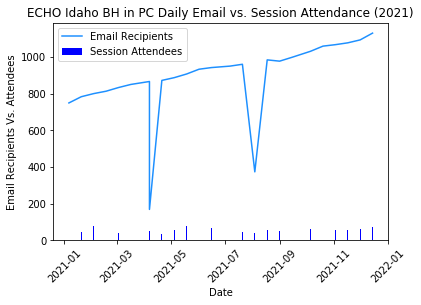

In [86]:
#Plot 2021 BH in PC series data, Session Attendance vs. Daily Email Recipients
#for each series, by year, create variables to plot the email data in a line graph
dailys_2021 = daily_emails_df.loc[(daily_emails_df['Date'] > '2021-01-01') & (daily_emails_df['Date'] < '2021-12-31')]
bhpc_dailys_2021 = dailys_2021.loc[(dailys_2021['Series'] == 'BH in PC')]
bhpc_2021_email_date = bhpc_dailys_2021['Date'].to_list()
bhpc_2021_email_recips = bhpc_dailys_2021['Successful Deliveries'].to_list()

#Recall attendance plot from above, change "plot" to "bar"
plt.bar(bhpc_date_2021, bhpc_attendance_2021, label = "Session Attendees", color='blue')

#add the new plots as a line graph from email data
plt.plot(bhpc_2021_email_date, bhpc_2021_email_recips, label = "Email Recipients", color='dodgerblue')

plt.title("ECHO Idaho BH in PC Daily Email vs. Session Attendance (2021)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

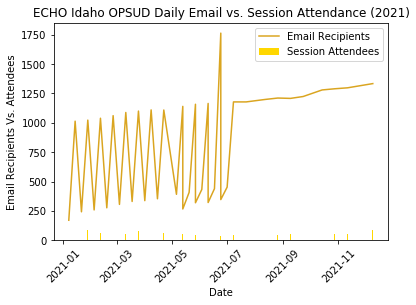

In [87]:
#Plot 2021 OPSUD series data, Session Attendance vs. Daily Email Recipients
#for each series, by year, create variables to plot the email data in a line graph
dailys_2021 = daily_emails_df.loc[(daily_emails_df['Date'] > '2021-01-01') & (daily_emails_df['Date'] < '2021-12-31')]
opsud_dailys_2021 = dailys_2021.loc[(dailys_2021['Series'] == 'OPSUD')]
opsud_2021_email_date = opsud_dailys_2021['Date'].to_list()
opsud_2021_email_recips = opsud_dailys_2021['Successful Deliveries'].to_list()

#Recall attendance plot from above, change "plot" to "bar"
plt.bar(OPSUD_date_2021, OPSUD_attendance_2021, label = "Session Attendees", color='gold')

#add the new plots as a line graph from email data
plt.plot(opsud_2021_email_date, opsud_2021_email_recips, label = "Email Recipients", color='goldenrod')

plt.title("ECHO Idaho OPSUD Daily Email vs. Session Attendance (2021)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

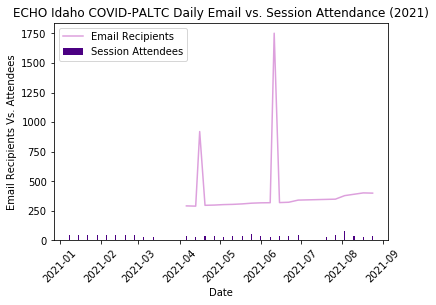

In [88]:
#Plot 2021 PALTC series data, Session Attendance vs. Daily Email Recipients
#for each series, by year, create variables to plot the email data in a line graph
dailys_2021 = daily_emails_df.loc[(daily_emails_df['Date'] > '2021-01-01') & (daily_emails_df['Date'] < '2021-12-31')]
PALTC_dailys_2021 = dailys_2021.loc[(dailys_2021['Series'] == 'PALTC')]
PALTC_2021_email_date = PALTC_dailys_2021['Date'].to_list()
PALTC_2021_email_recips = PALTC_dailys_2021['Successful Deliveries'].to_list()

#Recall attendance plot from above, change "plot" to "bar"
plt.bar(PALTC_date_2021, PALTC_attendance_2021, label = "Session Attendees", color='indigo')

#add the new plots as a line graph from email data
plt.plot(PALTC_2021_email_date, PALTC_2021_email_recips, label = "Email Recipients", color='plum')

plt.title("ECHO Idaho COVID-PALTC Daily Email vs. Session Attendance (2021)")
plt.xlabel("Date")
plt.ylabel("Email Recipients Vs. Attendees")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

# Program Growth by New Attendees

To visualize program growth from 2018-2022, create a scatterplot that shows the quantity of new attendees and total attendee population by date

In [89]:
#create a dataframe that lists unique participants by the first session they attended

# merge all the cleaned dataframes to get one df that will show cumulative attendance
df_2018 = iecho_data_2018[['Clinic Name', 'Session Topic', 'Full Name', 'Date']]
df_2019 = iecho_data_2019[['Clinic Name', 'Session Topic', 'Full Name', 'Date']]
df_2020 = iecho_data_2020[['Clinic Name', 'Session Topic', 'Full Name', 'Date']]
df_2021 = iecho_data_2021[['Clinic Name', 'Session Topic', 'Full Name', 'Date']]

#merge all the dataframes
df_cumulative = df_2018.append([df_2019, df_2020, df_2021], ignore_index=False, verify_integrity=False, sort=False)
df_cumulative['Date'] = pd.to_datetime(df_cumulative['Date'], format='%m/%d/%Y')
df_cumulative = df_cumulative.sort_values(by='Date')
# df_cumulative

In [90]:
#create a df that shows number of sessions per series, start date and end date
sessions = df_cumulative.drop_duplicates(subset=['Session Topic', 'Date'])
sessions = sessions.drop(columns=['Full Name', 'Date'], axis=1)
sessions = sessions.groupby('Clinic Name').count()
sessions

,Session Topic
Clinic Name,
BH in PC,79
COVID,60
CTSUDs,24
OPSUD,84
PALTC,41
PBH,10
PSUD,20
Syphilis,3
VHLC,12


In [91]:
#create new rows to append to the sessions df
series_start = df_cumulative.drop_duplicates(subset=['Clinic Name'], keep='first')
series_end = df_cumulative.drop_duplicates(subset=['Clinic Name'], keep='last')

series_start['Start Date'] = series_start['Date']
series_end['End Date'] = series_end['Date']

series_start = series_start.drop(columns = ['Session Topic','Full Name', 'Date'], axis=1)
series_end = series_end.drop(columns = ['Session Topic','Full Name', 'Date'], axis=1)

series_start = series_start.set_index("Clinic Name")
series_end = series_end.set_index("Clinic Name")

C:\Users\ssteffen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ssteffen\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [130]:
session_info = sessions.merge(series_start, how="right", on="Clinic Name")
session_info = session_info.merge(series_end, how="right", on="Clinic Name")
session_info = session_info.sort_values(by="Start Date")
session_info['Session Count'] = session_info['Session Topic']
session_info = session_info.drop(columns = ['Session Topic'], axis=1)
session_info

,Start Date,End Date,Session Count
Clinic Name,,,
OPSUD,2018-03-15,2021-12-09,84
BH in PC,2018-09-05,2021-12-15,79
XWT,2018-12-10,2021-09-20,9
PSUD,2020-03-11,2021-07-28,20
COVID,2020-03-24,2021-12-21,60
Syphilis,2020-08-12,2020-09-09,3
PALTC,2020-11-03,2021-08-24,41
CTSUDs,2021-01-07,2021-12-16,24
VHLC,2021-04-12,2021-09-27,12


In [131]:
#create a new df with the number of new attendees per ECHO session
df_cumulative_unique = df_cumulative.drop_duplicates(subset=['Full Name'], keep="first")

#add a "net total attendance" column that will show net total attendees by date
df_cumulative_unique = df_cumulative_unique.reset_index()
# df_cumulative_unique.head()

In [132]:
#drop the 'index' column
df_cumulative_unique = df_cumulative_unique.drop(columns='index')
# df_cumulative_unique.head()

In [133]:
# title the index "Net Attendance"
df_cumulative_unique = df_cumulative_unique.rename_axis("New Attendees")
# reset the index so that Net Attendance is a column in the df
df_cumulative_unique = df_cumulative_unique.reset_index("New Attendees")
# df_cumulative_unique.head()

In [146]:
#create a new df that captures number of new participants by session
New_participant_df = df_cumulative_unique.groupby(["Session Topic", "Clinic Name", "Date"]).count()
New_participant_df = New_participant_df.sort_values(by="Date")
New_participant_df = New_participant_df.drop(columns="Full Name")
New_participant_df.head()

,,,New Attendees
Session Topic,Clinic Name,Date,
ECHO for Addressing Opioid Addiction and Treatment,OPSUD,2018-03-15,30
CDC Guidelines for Prescribing Opioids for Chronic Pain: Part I,OPSUD,2018-03-29,12
CDC Guidelines for Prescribing Opioids for Chronic Pain: Part II,OPSUD,2018-04-12,9
"Taking a Pain History: Functional Assessment, Establishing a Pain Diagnosis, and Pain Tracker",OPSUD,2018-04-26,6
Opioid Use Disorder and Evidence-Based Screening,OPSUD,2018-05-10,5


In [157]:
# reset the index of the df so the columns are callable
New_participant_df.reset_index(inplace=True)

# add a column, Net Attendance, that adds the new attendance to the attendance total
New_participant_df['Net Attendance'] = New_participant_df['New Attendees'].cumsum()
New_participant_df.tail()

,level_0,index,Session Topic,Clinic Name,Date,New Attendees,Net Attendance
312,312,312,How to Stay Grounded and Not Flip Your Lid in ...,BH in PC,2021-12-01,5,2839
313,313,313,Virtual Recovery Coaching Resources,CTSUDs,2021-12-02,1,2840
314,314,314,Providing Care for the Unvaccinated: Psycholog...,COVID,2021-12-07,12,2852
315,315,315,Compassionate Care for People Who Use Opioids ...,OPSUD,2021-12-09,6,2858
316,316,316,Safety Planning,BH in PC,2021-12-15,10,2868


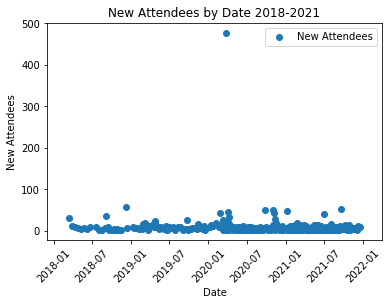

In [165]:
# A scatterplot showing quantity of new attendees by date
#y-axis is new attendees
#x-axis is date 


#set the x-axis to the date and create a y-axis for net attendance
x_axis_all = New_participant_df['Date'].to_list()
y_axis_all = New_participant_df['New Attendees'].to_list()

plt.scatter(x_axis_all, y_axis_all, label="New Attendees")
plt.title("New Attendees by Date 2018-2021")
plt.xlabel("Date")
plt.ylabel("New Attendees")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

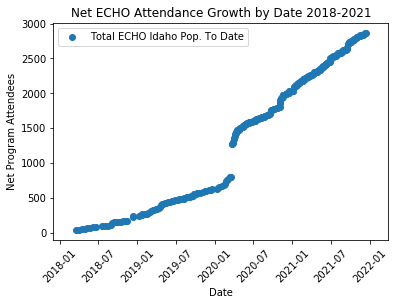

In [164]:
# A scatterplot showing net program growth by addition of new attendees
#set the x-axis to the date and create a y-axis for net attendance
x_axis_cum = New_participant_df['Date'].to_list()
y_axis_cum = New_participant_df['Net Attendance'].to_list()

plt.scatter(x_axis_cum, y_axis_cum, label="Total ECHO Idaho Pop. To Date")
plt.title("Net ECHO Attendance Growth by Date 2018-2021")
plt.xlabel("Date")
plt.ylabel("Net Program Attendees")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

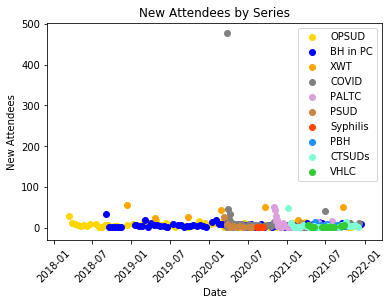

In [162]:
#create a scatterplot that shows net growth by series (color)
# x axis is date; y axis represents net new attendance
x_axis_opsud = New_participant_df.loc[(New_participant_df['Clinic Name'] == "OPSUD")]['Date'].to_list()
y_axis_opsud = New_participant_df.loc[(New_participant_df['Clinic Name'] == "OPSUD")]['New Attendees'].to_list()
y_axis_opsud2 = New_participant_df.loc[(New_participant_df['Clinic Name'] == "OPSUD")]['Net Attendance'].to_list()

x_axis_bhpc = New_participant_df.loc[(New_participant_df['Clinic Name'] == "BH in PC")]['Date'].to_list()
y_axis_bhpc = New_participant_df.loc[(New_participant_df['Clinic Name'] == "BH in PC")]['New Attendees'].to_list()
y_axis_bhpc2 = New_participant_df.loc[(New_participant_df['Clinic Name'] == "BH in PC")]['Net Attendance'].to_list()

x_axis_xwt = New_participant_df.loc[(New_participant_df['Clinic Name'] == "XWT")]['Date'].to_list()
y_axis_xwt = New_participant_df.loc[(New_participant_df['Clinic Name'] == "XWT")]['New Attendees'].to_list()
y_axis_xwt2 = New_participant_df.loc[(New_participant_df['Clinic Name'] == "XWT")]['Net Attendance'].to_list()

x_axis_covid = New_participant_df.loc[(New_participant_df['Clinic Name'] == "COVID")]['Date'].to_list()
y_axis_covid = New_participant_df.loc[(New_participant_df['Clinic Name'] == "COVID")]['New Attendees'].to_list()
y_axis_covid2 = New_participant_df.loc[(New_participant_df['Clinic Name'] == "COVID")]['Net Attendance'].to_list()

x_axis_paltc = New_participant_df.loc[(New_participant_df['Clinic Name'] == "PALTC")]['Date'].to_list()
y_axis_paltc = New_participant_df.loc[(New_participant_df['Clinic Name'] == "PALTC")]['New Attendees'].to_list()
y_axis_paltc2 = New_participant_df.loc[(New_participant_df['Clinic Name'] == "PALTC")]['Net Attendance'].to_list()

x_axis_psud = New_participant_df.loc[(New_participant_df['Clinic Name'] == "PSUD")]['Date'].to_list()
y_axis_psud = New_participant_df.loc[(New_participant_df['Clinic Name'] == "PSUD")]['New Attendees'].to_list()
y_axis_psud2 = New_participant_df.loc[(New_participant_df['Clinic Name'] == "PSUD")]['Net Attendance'].to_list()

x_axis_syphilis = New_participant_df.loc[(New_participant_df['Clinic Name'] == "Syphilis")]['Date'].to_list()
y_axis_syphilis = New_participant_df.loc[(New_participant_df['Clinic Name'] == "Syphilis")]['New Attendees'].to_list()
y_axis_syphilis2 = New_participant_df.loc[(New_participant_df['Clinic Name'] == "Syphilis")]['Net Attendance'].to_list()

x_axis_pbh = New_participant_df.loc[(New_participant_df['Clinic Name'] == "PBH")]['Date'].to_list()
y_axis_pbh = New_participant_df.loc[(New_participant_df['Clinic Name'] == "PBH")]['New Attendees'].to_list()
y_axis_pbh2 = New_participant_df.loc[(New_participant_df['Clinic Name'] == "PBH")]['Net Attendance'].to_list()

x_axis_ctsuds = New_participant_df.loc[(New_participant_df['Clinic Name'] == "CTSUDs")]['Date'].to_list()
y_axis_ctsuds = New_participant_df.loc[(New_participant_df['Clinic Name'] == "CTSUDs")]['New Attendees'].to_list()
y_axis_ctsuds2 = New_participant_df.loc[(New_participant_df['Clinic Name'] == "CTSUDs")]['Net Attendance'].to_list()

x_axis_vhlc = New_participant_df.loc[(New_participant_df['Clinic Name'] == "VHLC")]['Date'].to_list()
y_axis_vhlc = New_participant_df.loc[(New_participant_df['Clinic Name'] == "VHLC")]['New Attendees'].to_list()
y_axis_vhlc2 = New_participant_df.loc[(New_participant_df['Clinic Name'] == "VHLC")]['Net Attendance'].to_list()

plt.scatter(x_axis_opsud, y_axis_opsud, label="OPSUD", color= "gold")
plt.scatter(x_axis_bhpc, y_axis_bhpc, label="BH in PC", color= "blue")
plt.scatter(x_axis_xwt, y_axis_xwt, label="XWT", color= "orange")
plt.scatter(x_axis_covid, y_axis_covid, label="COVID", color= "gray")
plt.scatter(x_axis_paltc, y_axis_paltc, label="PALTC", color= "plum")
plt.scatter(x_axis_psud, y_axis_psud, label="PSUD", color= "peru")
plt.scatter(x_axis_syphilis, y_axis_syphilis, label="Syphilis", color= "orangered")
plt.scatter(x_axis_pbh, y_axis_pbh, label="PBH", color= "dodgerblue")
plt.scatter(x_axis_ctsuds, y_axis_ctsuds, label="CTSUDs", color= "aquamarine")
plt.scatter(x_axis_vhlc, y_axis_vhlc, label="VHLC", color= "limegreen")

plt.title("New Attendees by Series")
plt.xlabel("Date")
plt.ylabel("New Attendees")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

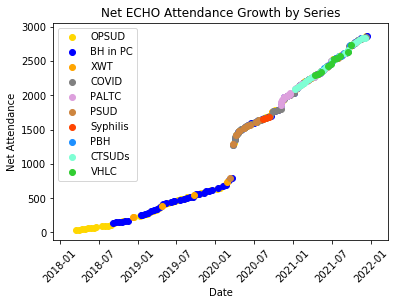

In [163]:
plt.scatter(x_axis_opsud, y_axis_opsud2, label="OPSUD", color= "gold")
plt.scatter(x_axis_bhpc, y_axis_bhpc2, label="BH in PC", color= "blue")
plt.scatter(x_axis_xwt, y_axis_xwt2, label="XWT", color= "orange")
plt.scatter(x_axis_covid, y_axis_covid2, label="COVID", color= "gray")
plt.scatter(x_axis_paltc, y_axis_paltc2, label="PALTC", color= "plum")
plt.scatter(x_axis_psud, y_axis_psud2, label="PSUD", color= "peru")
plt.scatter(x_axis_syphilis, y_axis_syphilis2, label="Syphilis", color= "orangered")
plt.scatter(x_axis_pbh, y_axis_pbh2, label="PBH", color= "dodgerblue")
plt.scatter(x_axis_ctsuds, y_axis_ctsuds2, label="CTSUDs", color= "aquamarine")
plt.scatter(x_axis_vhlc, y_axis_vhlc2, label="VHLC", color= "limegreen")

plt.title("Net ECHO Attendance Growth by Series")
plt.xlabel("Date")
plt.ylabel("Net Attendance")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [ ]:
# TO DO LIST: Proceed with plotting attendance vs email data for all the following               

# Cumulative XWTs